<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from collections import Counter 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nltk.corpus import stopwords
from sklearn import preprocessing
import re
import string
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading Tab 1 data 📂</strong></center></h2>
        
</div>

In [2]:
tab1 = pd.read_excel("tab 1.xlsx")

In [3]:
#looking at the first few records
tab1.head(3)

,foresee_respondent,foresee_session_id,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,site_performance_rate,taskaccompyn,survey_type,Login
0,QtJ8FtVotEhI8MUZYlYURg4C,6def7be8-e5bb-4ec6-b108-4bdfa4fc8f77,2022-05-29,Support,"Other services from AT&T (Home phone, DSL, etc.)",Desktop,AT&T Email help - set up or mange my email acc...,44.44,10,NaN,Yes,att com-C-Support-Desktop,Login Success-First Attempt
1,2Wc1mK10f74qaPgoqttrlVIVhnwUP9mI,265374ef-4f60-4fb0-8711-4d2556460ab8,2022-06-02,Account Management,Wireless,App,Check usage,0.00,1,NaN,No,att com-C-Account Management-Mobile Thin App,Login Success-First Attempt
2,OTiy1zhXNxhstiRxz4ZRhbSIS2O2ttsb,cf8a7372-62fb-4bd4-8b8f-e12121201137,2022-06-23,Account Management,Wireless,App,Make a payment,66.67,9,NaN,Yes,att com-C-Account Management-Mobile Thin App,Login Not Required


In [4]:
#looking at the last few records 
tab1.tail(3)

,foresee_respondent,foresee_session_id,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,site_performance_rate,taskaccompyn,survey_type,Login
68662,kENwtAhpZxh1hZwc4AZ9MA4C,577cb445-188c-48e8-a595-96e33c00bf52,2022-05-18,Support,Wireless,Desktop,Activate my products or services,0.0,1,NaN,No,att com-C-Support-Desktop,Login Not Required
68663,G5RBlhGqSbAdQmpCdkCmiSURvCisHfm3,e2e504f1-d473-41dc-9fbc-5ea30a048e18,2022-06-01,Support,Wireless,App,Contact AT&T Customer Service - find phone num...,0.0,5,NaN,No,att com-C-Support-Mobile Thin App,Login Success-First Attempt
68664,QR9hxgYwZ5QhBEUgwwtxEg4C,e9599d36-88e1-468b-8aac-3f4126096daa,2022-06-06,Support,BB,Desktop,"Plan, features or service help - review, chang...",0.0,1,NaN,No,att com-C-Support-Desktop,Login Unsuccessful


In [5]:
#Checking the null values
tab1.isnull().sum()

foresee_respondent           0
foresee_session_id           1
day                          0
Survey_Category              0
Product                      0
Platform                     0
main_task                    0
CSAT                         0
Effort                       0
site_performance_rate    68665
taskaccompyn                 0
survey_type                  0
Login                        0
dtype: int64

In [6]:
#As we can see that site_performance_rate column have NaN/missing valeus in all rows so we are going to drop this column. 
tab1=tab1.drop(columns=['site_performance_rate'])

In [7]:
#In the foresee_session_id, there is only one row which have missing value so going to drop that row only. 
tab1=tab1.dropna()

In [8]:
#Checking the null values again
tab1.isnull().sum()

foresee_respondent    0
foresee_session_id    0
day                   0
Survey_Category       0
Product               0
Platform              0
main_task             0
CSAT                  0
Effort                0
taskaccompyn          0
survey_type           0
Login                 0
dtype: int64

> Now we can see that there is no missing value so we are good to go. 

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading Tab 2 data 📂</strong></center></h2>
        
</div>

In [9]:
tab2 = pd.read_excel("tab 2.xlsx")

In [10]:
#looking at the first few records
tab2.head(3)

,foresee_respondent,foresee_session_id,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,site_performance_rate,taskaccompyn,survey_type,Login
0,Lg1TWHuSEWXwopJy8optyJBeVe4KJcVM,6fa338eb-613f-4f53-81f4-65fab36d5d2e,2022-04-09,Account Management,Wireless,Mobile Web,Enroll/unenroll in AutoPay,100.00,10,NaN,Yes,att com-C-Account Management-Mobile mSite,Login Success-First Attempt
1,ERt0w4g9U45gV8shlw4oRQ4C,401eb27f-f7ff-4e92-bc65-10b2295087ad,2022-03-29,Support,BB,Desktop,"Plan, features or service help - review, chang...",0.00,1,NaN,No,att com-C-Support-Desktop,Login Success-First Attempt
2,p7thgunAktoPD95S7hQnkdKxl0Xjy9hw,91978f10-7ee3-41c4-8318-704415077af5,2022-03-29,Support,Wireless,App,Other,44.44,1,NaN,No,att com-C-Support-Mobile Thin App,Login Success-Multiple Attempts


In [11]:
#looking at the last few records 
tab2.tail(3)

,foresee_respondent,foresee_session_id,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,site_performance_rate,taskaccompyn,survey_type,Login
72488,E0Owthh6S32BKHKsqW0n4ca9ZwAOEvTr,eae89671-2019-4132-8f74-bc95cc99864b,2022-04-04,Support,Wireless,Mobile Web,Other,100.0,8,NaN,Yes,att com-C-Support-Mobile mSite,Login Success-Multiple Attempts
72489,0pN1s1UZEIJwIwN9IAlYtQ4C,ec4c2dd6-9d43-4ad6-9eb4-7012f39e12bf,2022-04-23,Support,Wireless,Desktop,Contact AT&T Customer Service - find phone num...,0.0,10,NaN,No,att com-C-Support-Desktop,Login Unsuccessful
72490,P1T47ft2hUDh4Y75zCutuCCT31r0u4ZI,7b2967e8-a937-498f-9f7c-38db5ade1097,2022-04-28,Account Management,Wireless,App,Make a payment,100.0,10,NaN,Yes,att com-C-Account Management-Mobile Thin App,Login Success-First Attempt


In [12]:
#Checking the null values
tab2.isnull().sum()

foresee_respondent           0
foresee_session_id           5
day                          0
Survey_Category              0
Product                      0
Platform                     0
main_task                    0
CSAT                         0
Effort                       0
site_performance_rate    72491
taskaccompyn                 0
survey_type                  0
Login                        0
dtype: int64

In [13]:
#As we can see that site_performance_rate column have NaN/missing valeus in all rows so we are going to drop this column. 
tab2=tab2.drop(columns=['site_performance_rate'])

In [14]:
#In the foresee_session_id, there are only 5 rows which have missing value so going to drop only those rows. 
tab1=tab1.dropna()

In [15]:
#Checking the null values again
tab1.isnull().sum()

foresee_respondent    0
foresee_session_id    0
day                   0
Survey_Category       0
Product               0
Platform              0
main_task             0
CSAT                  0
Effort                0
taskaccompyn          0
survey_type           0
Login                 0
dtype: int64

> Now we can see that there is no missing value so we are good to go. 

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading Tab 3 data 📂</strong></center></h2>
        
</div>

In [16]:
tab3 = pd.read_excel("tab 3.xlsx")

In [17]:
#looking at the first few records
tab3.head(3)

,FORESEE_SESSION,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD,DEVICE_TYPE
0,f84c643a-ad55-4a54-8eee-dec1a56e6849,2022-06-14,1,36,7,4,1,0,0,Desktop
1,0c1caa99-375e-4e23-8ef5-e9020e3a70c0,2022-02-26,1,12,1,1,0,0,0,Mobile Phone
2,999db7b9-d1f7-47db-af7d-a892fd5e0f9f,2022-06-05,1,16,11,3,1,0,1,Mobile Phone


In [18]:
#looking at the last few records 
tab3.tail(3)

,FORESEE_SESSION,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD,DEVICE_TYPE
593990,1b9d186d-ad2e-4e50-b47f-c863c3cde9b9,2022-03-24,0,15,15,2,1,0,1,Mobile Phone
593991,afa49693-c4de-4eea-8bfc-ccffa197f777,2022-04-29,1,13,3,2,0,0,0,Desktop
593992,eea669b9-65e8-441c-b110-f177fd54552f,2022-02-24,0,11,8,5,0,0,0,Mobile Phone


In [19]:
#Checking the null values
tab3.isnull().sum()

FORESEE_SESSION      0
EVENT_DATE           0
LOGIN_SUCCESS        0
EVNTS                0
LOGIN_EVNTS          0
LOGIN_ATTEMPTS       0
TWOFACTORAUTH        0
FORGOT_ID            0
FORGOT_PWD           0
DEVICE_TYPE        220
dtype: int64

In [20]:
#In the DEVICE_TYPE, there are only 220 rows missing from around 0.5 million records so going to drop them. 
# We can impute the values but there is shortage of the data 
tab3=tab3.dropna()

In [21]:
#Checking the null values again
tab3.isnull().sum()

FORESEE_SESSION    0
EVENT_DATE         0
LOGIN_SUCCESS      0
EVNTS              0
LOGIN_EVNTS        0
LOGIN_ATTEMPTS     0
TWOFACTORAUTH      0
FORGOT_ID          0
FORGOT_PWD         0
DEVICE_TYPE        0
dtype: int64

> Now we can see that there is no missing value so we are good to go. 

### Combining the tab1 and tab2 data

In [22]:
tab12=pd.concat([tab1,tab2])

### Renaming the column name as previous tabs because we have to apply join

In [23]:
tab3=tab3.rename(columns={'FORESEE_SESSION':'foresee_session_id'})

### Now merging/joining the combined data of tab 1 and tab 2 with tab 3

In [24]:
data=tab3.merge(tab12, left_on=['foresee_session_id'], right_on=['foresee_session_id',], how='right')

In [25]:
data

,foresee_session_id,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD,DEVICE_TYPE,...,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,taskaccompyn,survey_type,Login
0,6def7be8-e5bb-4ec6-b108-4bdfa4fc8f77,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-05-29,Support,"Other services from AT&T (Home phone, DSL, etc.)",Desktop,AT&T Email help - set up or mange my email acc...,44.44,10,Yes,att com-C-Support-Desktop,Login Success-First Attempt
1,265374ef-4f60-4fb0-8711-4d2556460ab8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-06-02,Account Management,Wireless,App,Check usage,0.00,1,No,att com-C-Account Management-Mobile Thin App,Login Success-First Attempt
2,cf8a7372-62fb-4bd4-8b8f-e12121201137,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-06-23,Account Management,Wireless,App,Make a payment,66.67,9,Yes,att com-C-Account Management-Mobile Thin App,Login Not Required
3,49a8887d-c8c1-46d3-81c8-e02394c4ede6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-05-31,Support,Wireless,Desktop,Troubleshooting - fix a problem with my device...,0.00,1,No,att com-C-Support-Desktop,Login Not Required
4,d1ea3aa8-cd0b-4cf6-a1f7-21936e072f37,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-05-21,Support,Wireless,Mobile Web,Troubleshooting - fix a problem with my device...,0.00,1,No,att com-C-Support-Mobile mSite,Login Success-Multiple Attempts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142350,6a1f67fd-26c6-4060-bde9-c654452168c4,2022-03-20,1.0,19.0,5.0,2.0,1.0,0.0,0.0,Desktop,...,2022-03-20,Support,Wireless,Desktop,Other,92.59,9,Yes,att com-C-Support-Desktop,Login Success-First Attempt
142351,b196f239-0138-47c3-a63d-c6f308e0d99f,2022-04-28,0.0,22.0,18.0,5.0,0.0,1.0,0.0,Mobile Phone,...,2022-04-28,Account Management,Wireless,Mobile Web,Update payment method,77.78,8,Yes,att com-C-Account Management-Mobile mSite,Login Unsuccessful
142352,eae89671-2019-4132-8f74-bc95cc99864b,2022-04-04,-2.0,6.0,2.0,1.0,0.0,0.0,0.0,Mobile Phone,...,2022-04-04,Support,Wireless,Mobile Web,Other,100.00,8,Yes,att com-C-Support-Mobile mSite,Login Success-Multiple Attempts
142353,ec4c2dd6-9d43-4ad6-9eb4-7012f39e12bf,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-04-23,Support,Wireless,Desktop,Contact AT&T Customer Service - find phone num...,0.00,10,No,att com-C-Support-Desktop,Login Unsuccessful


> We can see above, there are some missing/Nan values after merging/joining because the number of records of tab3 was more than tab1 + tab2. Now we are going to drop the missing values rows and will take only unique rows where all the data contains. 

In [26]:
data=data.dropna()
data

,foresee_session_id,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD,DEVICE_TYPE,...,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,taskaccompyn,survey_type,Login
7,ed693c80-bf85-41df-b910-4e1b102765a0,2022-05-26,0.0,19.0,5.0,2.0,0.0,0.0,0.0,Mobile Phone,...,2022-05-26,Account Management,Wireless,Mobile Web,Contact AT&T Customer Service,29.63,1,No,att com-C-Account Management-Mobile mSite,Login Unsuccessful
8,54e3b183-74d9-4555-94f4-1ad22c4d76d6,2022-05-19,1.0,24.0,7.0,3.0,1.0,0.0,0.0,Desktop,...,2022-05-19,Account Management,Wireless,Desktop,Other,88.89,9,Yes,att com-C-Account Management-Desktop,Login Success-First Attempt
9,746f385a-30fa-4c88-960c-b326ac22eca6,2022-05-10,1.0,22.0,3.0,2.0,0.0,0.0,0.0,Desktop,...,2022-05-10,Account Management,BB,Desktop,Make a payment,0.00,1,Yes,att com-C-Account Management-Desktop,Login Success-First Attempt
13,2b57485a-8628-4ce9-b87b-77215ebd4da3,2022-05-28,1.0,10.0,5.0,3.0,0.0,0.0,0.0,Mobile Phone,...,2022-05-28,Sales,BB,Mobile Web,Upgrade or add to my current internet service ...,100.00,10,Yes,att com-C-Sales-Mobile mSite,Login Success-First Attempt
14,9ea10a9e-f83b-4bf9-9fa4-e914efe00d47,2022-05-20,1.0,19.0,6.0,3.0,1.0,0.0,0.0,Desktop,...,2022-05-20,Account Management,Wireless,Desktop,Make a payment,11.11,2,No,att com-C-Account Management-Desktop,Login Success-First Attempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142345,96c1577a-cea0-4c8c-a52d-023ba8d00a22,2022-04-16,1.0,20.0,10.0,3.0,0.0,0.0,1.0,Desktop,...,2022-04-16,Account Management,Wireless,Desktop,View current bill,77.78,8,Yes,att com-C-Account Management-Desktop,Login Success-First Attempt
142346,963d7809-8a7a-4378-8081-036b5ce54074,2022-04-27,1.0,39.0,13.0,9.0,0.0,0.0,0.0,Desktop,...,2022-04-27,Account Management,Wireless,Desktop,Set up or manage email account (includes email...,0.00,1,No,att com-C-Account Management-Desktop,Login Success-Multiple Attempts
142350,6a1f67fd-26c6-4060-bde9-c654452168c4,2022-03-20,1.0,19.0,5.0,2.0,1.0,0.0,0.0,Desktop,...,2022-03-20,Support,Wireless,Desktop,Other,92.59,9,Yes,att com-C-Support-Desktop,Login Success-First Attempt
142351,b196f239-0138-47c3-a63d-c6f308e0d99f,2022-04-28,0.0,22.0,18.0,5.0,0.0,1.0,0.0,Mobile Phone,...,2022-04-28,Account Management,Wireless,Mobile Web,Update payment method,77.78,8,Yes,att com-C-Account Management-Mobile mSite,Login Unsuccessful


> We can see that, all the data is perfectly joined. 

<div class="alert alert-block alert-info">  
<h2><center><strong>Now its time to analyse all data</strong></center></h2>
        
</div>

#### Five top records of data

In [27]:
data.head()

,foresee_session_id,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD,DEVICE_TYPE,...,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,taskaccompyn,survey_type,Login
7,ed693c80-bf85-41df-b910-4e1b102765a0,2022-05-26,0.0,19.0,5.0,2.0,0.0,0.0,0.0,Mobile Phone,...,2022-05-26,Account Management,Wireless,Mobile Web,Contact AT&T Customer Service,29.63,1,No,att com-C-Account Management-Mobile mSite,Login Unsuccessful
8,54e3b183-74d9-4555-94f4-1ad22c4d76d6,2022-05-19,1.0,24.0,7.0,3.0,1.0,0.0,0.0,Desktop,...,2022-05-19,Account Management,Wireless,Desktop,Other,88.89,9,Yes,att com-C-Account Management-Desktop,Login Success-First Attempt
9,746f385a-30fa-4c88-960c-b326ac22eca6,2022-05-10,1.0,22.0,3.0,2.0,0.0,0.0,0.0,Desktop,...,2022-05-10,Account Management,BB,Desktop,Make a payment,0.00,1,Yes,att com-C-Account Management-Desktop,Login Success-First Attempt
13,2b57485a-8628-4ce9-b87b-77215ebd4da3,2022-05-28,1.0,10.0,5.0,3.0,0.0,0.0,0.0,Mobile Phone,...,2022-05-28,Sales,BB,Mobile Web,Upgrade or add to my current internet service ...,100.00,10,Yes,att com-C-Sales-Mobile mSite,Login Success-First Attempt
14,9ea10a9e-f83b-4bf9-9fa4-e914efe00d47,2022-05-20,1.0,19.0,6.0,3.0,1.0,0.0,0.0,Desktop,...,2022-05-20,Account Management,Wireless,Desktop,Make a payment,11.11,2,No,att com-C-Account Management-Desktop,Login Success-First Attempt


#### Five last records of data

In [28]:
data.tail()

,foresee_session_id,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD,DEVICE_TYPE,...,day,Survey_Category,Product,Platform,main_task,CSAT,Effort,taskaccompyn,survey_type,Login
142345,96c1577a-cea0-4c8c-a52d-023ba8d00a22,2022-04-16,1.0,20.0,10.0,3.0,0.0,0.0,1.0,Desktop,...,2022-04-16,Account Management,Wireless,Desktop,View current bill,77.78,8,Yes,att com-C-Account Management-Desktop,Login Success-First Attempt
142346,963d7809-8a7a-4378-8081-036b5ce54074,2022-04-27,1.0,39.0,13.0,9.0,0.0,0.0,0.0,Desktop,...,2022-04-27,Account Management,Wireless,Desktop,Set up or manage email account (includes email...,0.00,1,No,att com-C-Account Management-Desktop,Login Success-Multiple Attempts
142350,6a1f67fd-26c6-4060-bde9-c654452168c4,2022-03-20,1.0,19.0,5.0,2.0,1.0,0.0,0.0,Desktop,...,2022-03-20,Support,Wireless,Desktop,Other,92.59,9,Yes,att com-C-Support-Desktop,Login Success-First Attempt
142351,b196f239-0138-47c3-a63d-c6f308e0d99f,2022-04-28,0.0,22.0,18.0,5.0,0.0,1.0,0.0,Mobile Phone,...,2022-04-28,Account Management,Wireless,Mobile Web,Update payment method,77.78,8,Yes,att com-C-Account Management-Mobile mSite,Login Unsuccessful
142352,eae89671-2019-4132-8f74-bc95cc99864b,2022-04-04,-2.0,6.0,2.0,1.0,0.0,0.0,0.0,Mobile Phone,...,2022-04-04,Support,Wireless,Mobile Web,Other,100.00,8,Yes,att com-C-Support-Mobile mSite,Login Success-Multiple Attempts


#### Coloumns/features in data

In [29]:
data.columns

Index(['foresee_session_id', 'EVENT_DATE', 'LOGIN_SUCCESS', 'EVNTS',
       'LOGIN_EVNTS', 'LOGIN_ATTEMPTS', 'TWOFACTORAUTH', 'FORGOT_ID',
       'FORGOT_PWD', 'DEVICE_TYPE', 'foresee_respondent', 'day',
       'Survey_Category', 'Product', 'Platform', 'main_task', 'CSAT', 'Effort',
       'taskaccompyn', 'survey_type', 'Login'],
      dtype='object')

#### Length of data

In [30]:
print('lenght of data is', len(data))

lenght of data is 70153


#### Shape of data

In [31]:
data.shape

(70153, 21)

#### Data information

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70153 entries, 7 to 142352
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   foresee_session_id  70153 non-null  object        
 1   EVENT_DATE          70153 non-null  datetime64[ns]
 2   LOGIN_SUCCESS       70153 non-null  float64       
 3   EVNTS               70153 non-null  float64       
 4   LOGIN_EVNTS         70153 non-null  float64       
 5   LOGIN_ATTEMPTS      70153 non-null  float64       
 6   TWOFACTORAUTH       70153 non-null  float64       
 7   FORGOT_ID           70153 non-null  float64       
 8   FORGOT_PWD          70153 non-null  float64       
 9   DEVICE_TYPE         70153 non-null  object        
 10  foresee_respondent  70153 non-null  object        
 11  day                 70153 non-null  datetime64[ns]
 12  Survey_Category     70153 non-null  object        
 13  Product             70153 non-null  object   

#### Data types of all coloumns

In [33]:
data.dtypes

foresee_session_id            object
EVENT_DATE            datetime64[ns]
LOGIN_SUCCESS                float64
EVNTS                        float64
LOGIN_EVNTS                  float64
LOGIN_ATTEMPTS               float64
TWOFACTORAUTH                float64
FORGOT_ID                    float64
FORGOT_PWD                   float64
DEVICE_TYPE                   object
foresee_respondent            object
day                   datetime64[ns]
Survey_Category               object
Product                       object
Platform                      object
main_task                     object
CSAT                         float64
Effort                         int64
taskaccompyn                  object
survey_type                   object
Login                         object
dtype: object

#### Checking Null values / missing values

In [34]:
np.sum(data.isnull().any(axis=1))

0

#### Counts of missing values in each column

In [35]:
data.isnull().sum()

foresee_session_id    0
EVENT_DATE            0
LOGIN_SUCCESS         0
EVNTS                 0
LOGIN_EVNTS           0
LOGIN_ATTEMPTS        0
TWOFACTORAUTH         0
FORGOT_ID             0
FORGOT_PWD            0
DEVICE_TYPE           0
foresee_respondent    0
day                   0
Survey_Category       0
Product               0
Platform              0
main_task             0
CSAT                  0
Effort                0
taskaccompyn          0
survey_type           0
Login                 0
dtype: int64

#### Rows and columns in the dataset

In [36]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   21


In [37]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   70153


### Taking copy of the data before doing encoding of the features 

In [38]:
data1=data.copy()

### Looking the at the counts of login attempts 

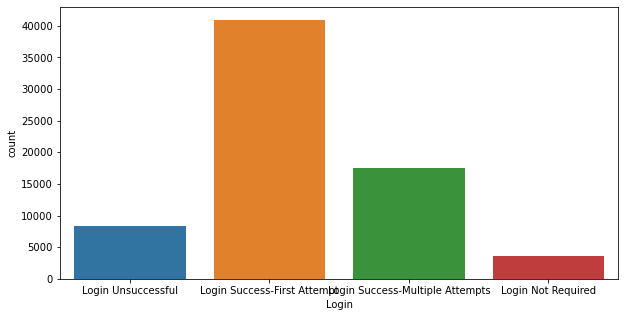

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(data= data, x = "Login")
plt.show()

In [40]:
data['Login'].value_counts()

Login Success-First Attempt        40917
Login Success-Multiple Attempts    17436
Login Unsuccessful                  8268
Login Not Required                  3532
Name: Login, dtype: int64

> We can see that most of the time login was successful after first attempt with the count of 40917 but the user was also successful after multi attempts with the count of 17436. The unsuccessul count is 8268 which is still high. 

### A correlation between survey categories and task accomplishment as it relates to login.

In [41]:
#looking at the value counts
data['taskaccompyn'].value_counts()

Yes    35208
No     34945
Name: taskaccompyn, dtype: int64

In [42]:
#Encoding the Yes as 0 and No as 1
data['taskaccompyn']=data['taskaccompyn'].replace('Yes',0)
data['taskaccompyn']=data['taskaccompyn'].replace('No',1)

In [43]:
#Again looking at the value counts
data['taskaccompyn'].value_counts()

0    35208
1    34945
Name: taskaccompyn, dtype: int64

> It's good to do data analysis now using taskaccompyn column. 

In [44]:
#looking at the value counts
data['Survey_Category'].value_counts()

Account Management    42809
Support               17060
Sales                 10284
Name: Survey_Category, dtype: int64

In [45]:
#Encoding the Account Management  as 0, Support as 1 and Sales as 2
data['Survey_Category']=data['Survey_Category'].replace('Account Management',0)
data['Survey_Category']=data['Survey_Category'].replace('Support',1)
data['Survey_Category']=data['Survey_Category'].replace('Sales',2)

In [46]:
#Again looking at the value counts
data['Survey_Category'].value_counts()

0    42809
1    17060
2    10284
Name: Survey_Category, dtype: int64

> It's good to do data analysis now using Survey_Category column. 

In [47]:
#looking at the value counts
data['Login'].value_counts()

Login Success-First Attempt        40917
Login Success-Multiple Attempts    17436
Login Unsuccessful                  8268
Login Not Required                  3532
Name: Login, dtype: int64

In [48]:
#Encoding the Login Success-First Attempt  as 0, Login Success-Multiple Attempts as 1, Login Unsuccessful as 2 
# and Login Not Required  as 3

data['Login']=data['Login'].replace('Login Success-First Attempt',0)
data['Login']=data['Login'].replace('Login Success-Multiple Attempts',1)
data['Login']=data['Login'].replace('Login Unsuccessful',2)
data['Login']=data['Login'].replace('Login Not Required',3)

In [49]:
#Again looking at the value counts
data['Login'].value_counts()

0    40917
1    17436
2     8268
3     3532
Name: Login, dtype: int64

> It's good to do data analysis now using Login column. 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

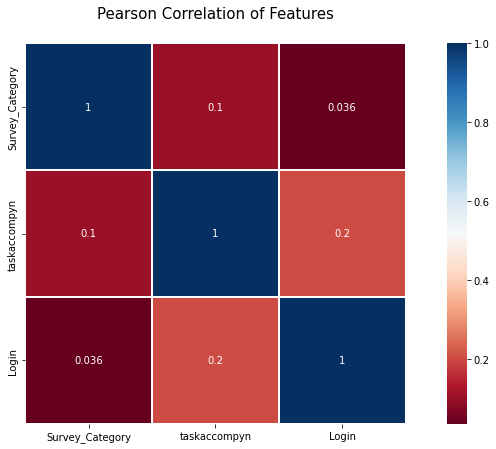

In [50]:
cols=['Survey_Category','taskaccompyn', 'Login']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [51]:
cols.corr()

,Survey_Category,taskaccompyn,Login
Survey_Category,1.000000,0.103312,0.036425
taskaccompyn,0.103312,1.000000,0.204443
Login,0.036425,0.204443,1.000000


> Login is good correlated with Survey_Category but not well corellated with task accomplishment. We encoded the categorical features into numeric form so correlation can be calculated. 

### Correlation of the product and the task accomplishment as it relates to login types 

In [52]:
#looking at the value counts
data['Product'].value_counts()

Wireless                                            40277
BB                                                  22443
Other services from AT&T (Home phone, DSL, etc.)     6132
Other services from AT&T (Home phone, DSL,etc.)      1301
Name: Product, dtype: int64

In [53]:
#Encoding the Wireless as 0, BB as 1, Other services from AT&T (Home phone, DSL, etc.) as 2 
# and Other services from AT&T (Home phone, DSL,etc.)  as 2 because these are the same categories

data['Product']=data['Product'].replace('Wireless',0)
data['Product']=data['Product'].replace('BB',1)
data['Product']=data['Product'].replace('Other services from AT&T (Home phone, DSL,etc.)',"Other services from AT&T (Home phone, DSL, etc.)")
data['Product']=data['Product'].replace('Other services from AT&T (Home phone, DSL, etc.)',2)

In [54]:
#Again looking at the value counts
data['Product'].value_counts()

0    40277
1    22443
2     7433
Name: Product, dtype: int64

> It's good to do data analysis now using Product column. 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

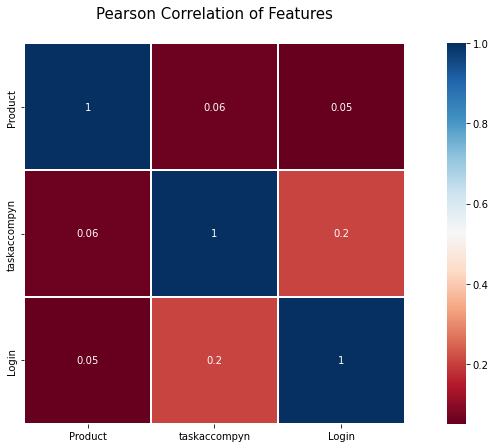

In [55]:
cols=['Product','taskaccompyn', 'Login']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [56]:
cols.corr()

,Product,taskaccompyn,Login
Product,1.00000,0.059650,0.050210
taskaccompyn,0.05965,1.000000,0.204443
Login,0.05021,0.204443,1.000000


> There is strong correlation between Product, task acccomplishment and Login. 

## Correlation between the different types of login 

In [57]:
col1, col2 = "Login", "Login"
corr = data[col1].corr(data[col2])
print ("Correlation between the different types of login ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between the different types of login  Login  and  Login is:  1.0


> There is strong correlation between the different types. 

## 2FA correlation with the task acccomplishment

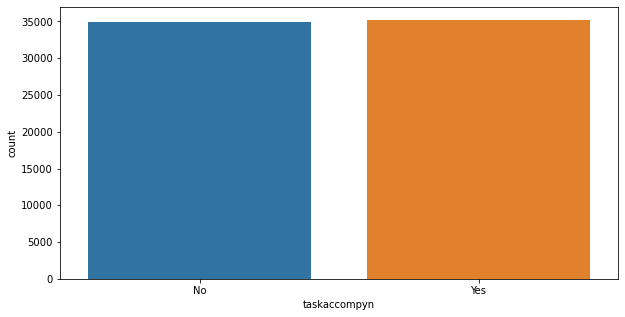

In [58]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(data= data1, x = "taskaccompyn")
plt.show()

In [59]:
data['taskaccompyn'].value_counts()

0    35208
1    34945
Name: taskaccompyn, dtype: int64

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

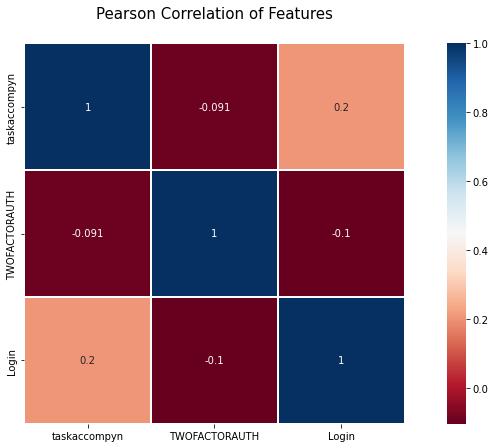

In [60]:
cols=['taskaccompyn','TWOFACTORAUTH','Login']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [61]:
cols.corr()

,taskaccompyn,TWOFACTORAUTH,Login
taskaccompyn,1.000000,-0.090655,0.204443
TWOFACTORAUTH,-0.090655,1.000000,-0.103000
Login,0.204443,-0.103000,1.000000


> Correlation of the task acccomplishment and 2FA is very week. I think it should be strong but login correlation is good with the task acccomplishment.

## Let’s look at the various login types against the platform and also against the product

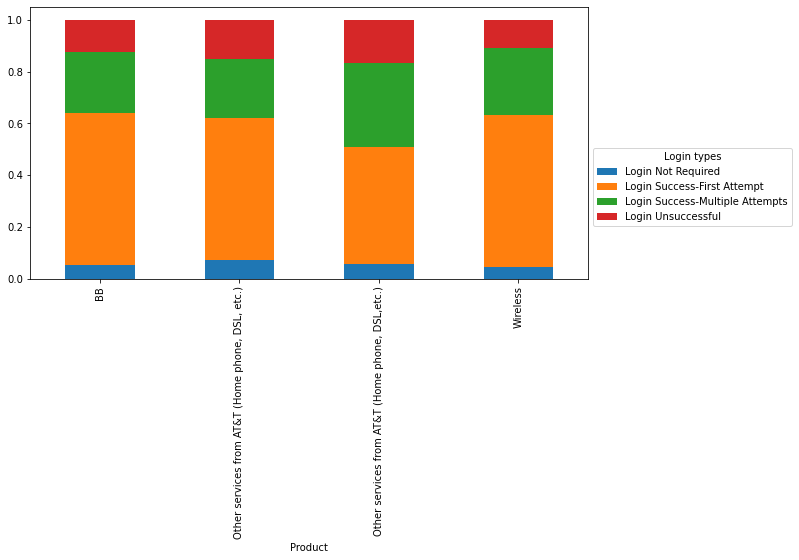

In [63]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data1.Product,data1.Login,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='Login types',loc='upper left',bbox_to_anchor=(1, 0.5))

> There is almost 15% of the time, the login was unsuccessul. Around 10% users faced login not required. The users who login from wireless/wifi, their login was successful more than other products.

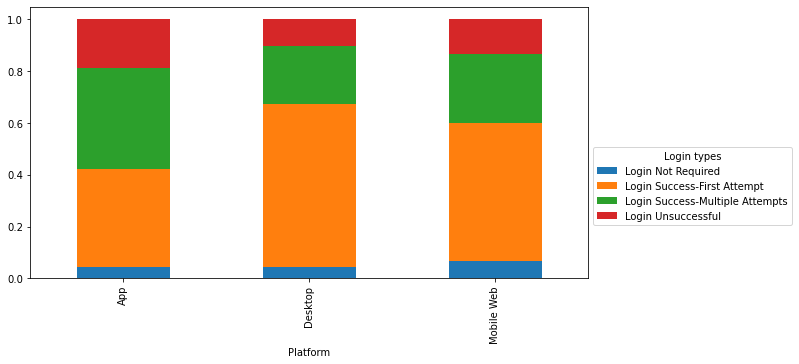

In [64]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data1.Platform,data1.Login,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='Login types',loc='upper left',bbox_to_anchor=(1, 0.5))

> If we look at the platforms, login success on the first attempt was done most of the time on the Desktop and second ratio comes under the multiple attempts. Login unsuccessful happened most of time using Apps. 

## let’s look at the main tasks and maybe run a decision tree for the login experience and also 2fa

### Top 10 tasks with higher number of 2 factor euthentication

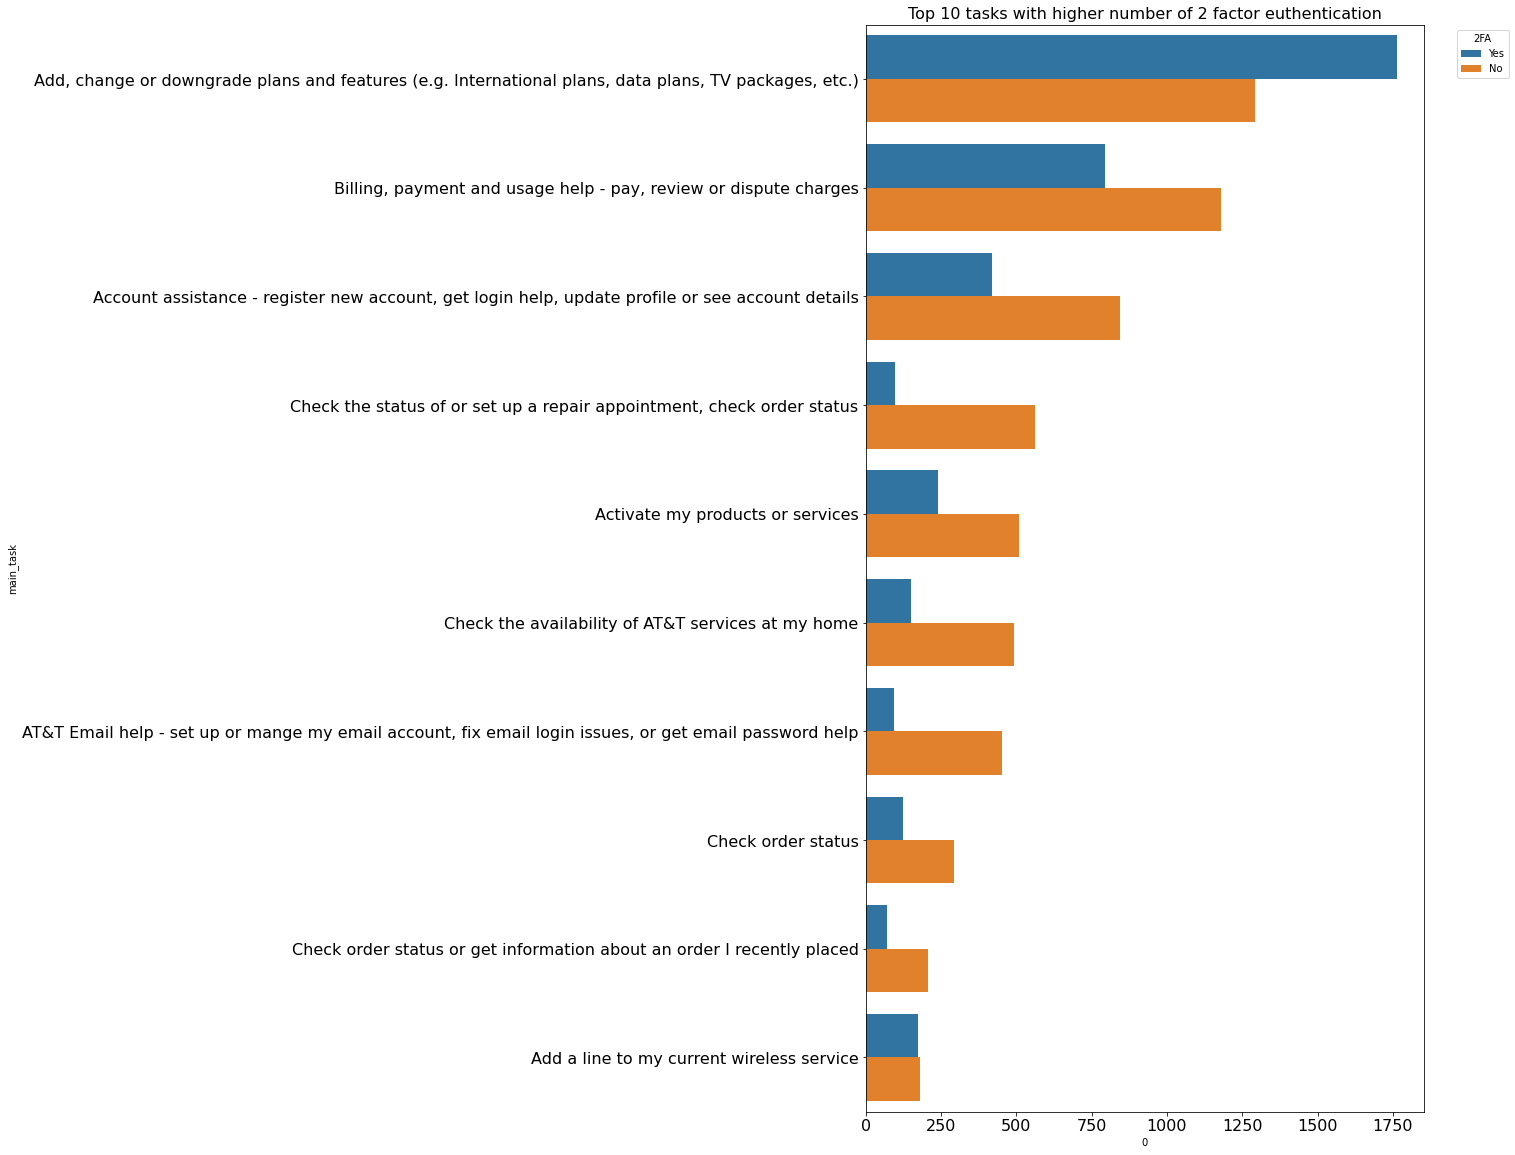

In [67]:
plt.figure(figsize=(10,20))    
data2=data1.copy()
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(0.0,'No')
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(1.0,'Yes')
df3 = data2[['main_task', 'TWOFACTORAUTH']].value_counts().reset_index().sort_values(by = 'main_task', ascending = True).head(20)
sns.barplot(y = 'main_task', x  = 0, hue = 'TWOFACTORAUTH', data = df3.sort_values(0, ascending = False))
plt.legend(title='2FA', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.title("Top 10 tasks with higher number of 2 factor euthentication", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

### main_task text in lower case

In [68]:
data['main_task']=data['main_task'].str.lower()

### Preprocess data on Descripcion

In [69]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

### Remove_repeating_char

In [70]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

### ProcessPost for applying all functions

In [71]:
def processPost(text): 

    text = re.sub('@[^\s]+', ' ', text)
    

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

    text = re.sub(r'###([^\s]+)', r'\1', text)

    text= remove_punctuations(text)
    text=remove_repeating_char(text)
    
    return text

### Applying processPost function for preprocessing

In [72]:
data["main_task"] = data["main_task"].apply(lambda x: processPost(x))

In [73]:
for numbers in '0123456789':
    data["main_task"]=data["main_task"].str.replace(numbers,'')

### Getting Tokenization

In [74]:
tokenizer = RegexpTokenizer(r'\w+')
data["main_task"] = data["main_task"].apply(tokenizer.tokenize)

In [75]:
data["main_task"].head()

7                      [contact, at, customer, service]
8                                               [other]
9                                    [make, a, payment]
13    [upgrade, or, ad, to, my, curent, internet, se...
14                                   [make, a, payment]
Name: main_task, dtype: object

### Description of main_task ext information

In [76]:
all_words = [word for tokens in data["main_task"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["main_task"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

426933 words total, with a vocabulary size of 144
Max sentence length is 19


### Top 25 words in main_task

In [77]:
counter = Counter(all_words)

In [78]:
counter.most_common(25)

[('or', 27015),
 ('a', 24710),
 ('payment', 15871),
 ('service', 14193),
 ('my', 12846),
 ('at', 12687),
 ('make', 12130),
 ('curent', 11854),
 ('view', 10526),
 ('plans', 9612),
 ('other', 8770),
 ('bil', 8567),
 ('and', 7173),
 ('device', 7127),
 ('fix', 6466),
 ('wireles', 6348),
 ('check', 6079),
 ('troubleshoting', 5918),
 ('problem', 5918),
 ('with', 5918),
 ('acount', 5875),
 ('help', 5599),
 ('products', 5245),
 ('ad', 4793),
 ('set', 4744)]

In [79]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

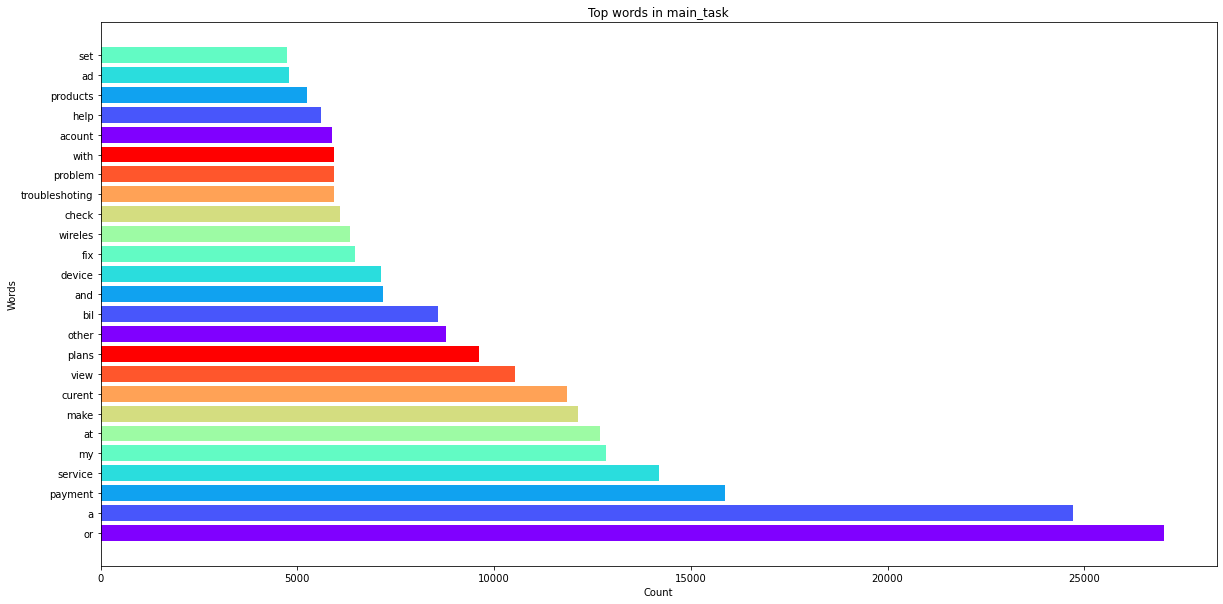

In [80]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in main_task')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

### Word cloud of  main_task where Login Success-First Attempt

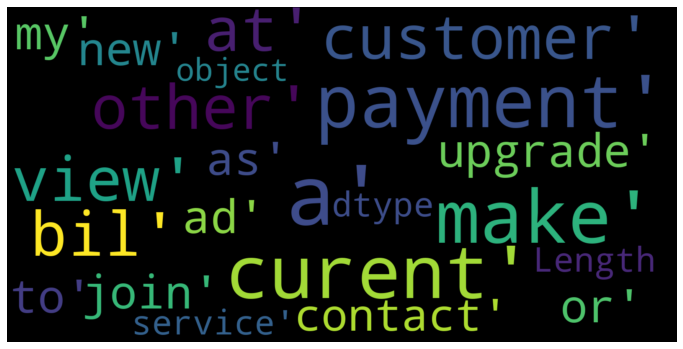

In [81]:
data11=data[data['Login']==0]
neg =data11['main_task']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word cloud of  main_task where Login Success-Multiple Attempts

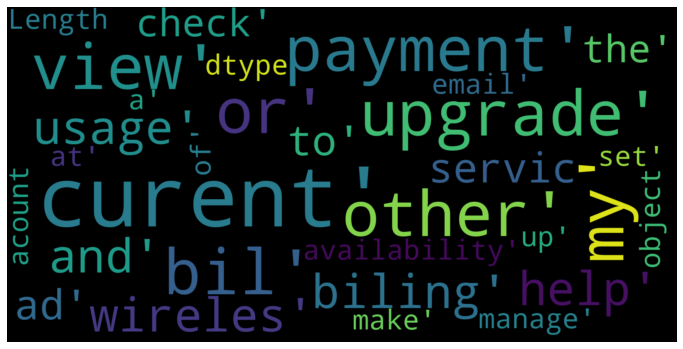

In [82]:
data11=data[data['Login']==1]
neg =data11['main_task']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word cloud of  main_task where Login Unsuccessful 

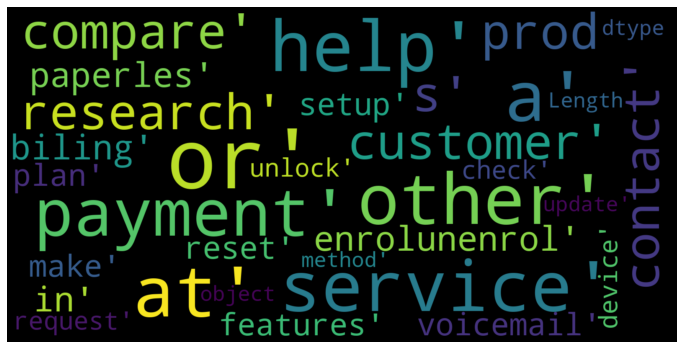

In [83]:
data11=data[data['Login']==2]
neg =data11['main_task']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word cloud of  main_task where Login Not Required

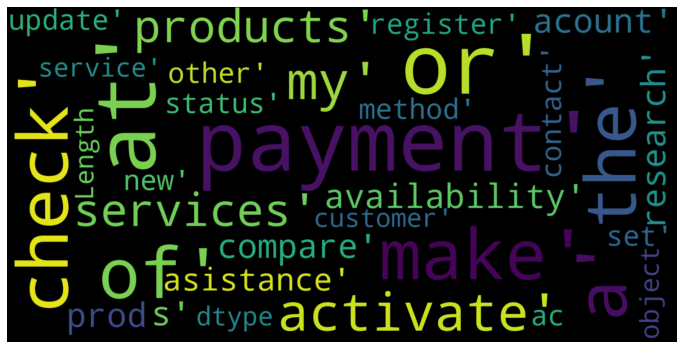

In [84]:
data11=data[data['Login']==3]
neg =data11['main_task']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

> If we look at the main tasks deeply, users are talking about two things:

    - Payment 
    
    - Service
 

### Deleting the columns which are not useful in the decision trees and also for the importance of features. 

In [85]:
data=data.drop(columns=['foresee_session_id','EVENT_DATE','main_task','foresee_respondent','day'])

### Enconding the following features as well 

In [86]:
data['DEVICE_TYPE']=data['DEVICE_TYPE'].astype('category').cat.codes
data['Platform']=data['Platform'].astype('category').cat.codes
data['survey_type']=data['survey_type'].astype('category').cat.codes

### Taking input features and login experiance 

In [87]:
X=data.drop(columns=['Login'])
y=data['Login']

### Spliting data into Training and Testing

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

## Decision Trees

In [89]:
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

DecisionTreeClassifier(max_depth=2, random_state=0)

### Accuracy of the decision trees model

In [90]:
y_pred1 = DTC.predict(X_test)
dt=DTC.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.62


> We used the login data to check the experiance of the users. There is 62% accuracy to know the login experiance as following: 
- Login Success-First Attempt       
- Login Success-Multiple Attempts   
- Login Unsuccessful               
- Login Not Required   

### Taking input features and 2fa

In [91]:
X=data.drop(columns=['TWOFACTORAUTH'])
y=data['TWOFACTORAUTH']

### Spliting data into Training and Testing

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

## Decision Trees

In [93]:
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

DecisionTreeClassifier(max_depth=2, random_state=0)

### Accuracy of the decision trees model

In [94]:
y_pred1 = DTC.predict(X_test)
dt=DTC.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.79


> Similarly, we used the 2FA data to check the experiance of the users with two factor authenticity. There is 79% accuracy on the 2fa which is perfect.  
The 2FA grant access or not which is very impotant while login to the account. 

## Features importance 

### Features Importance with respect to Login

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


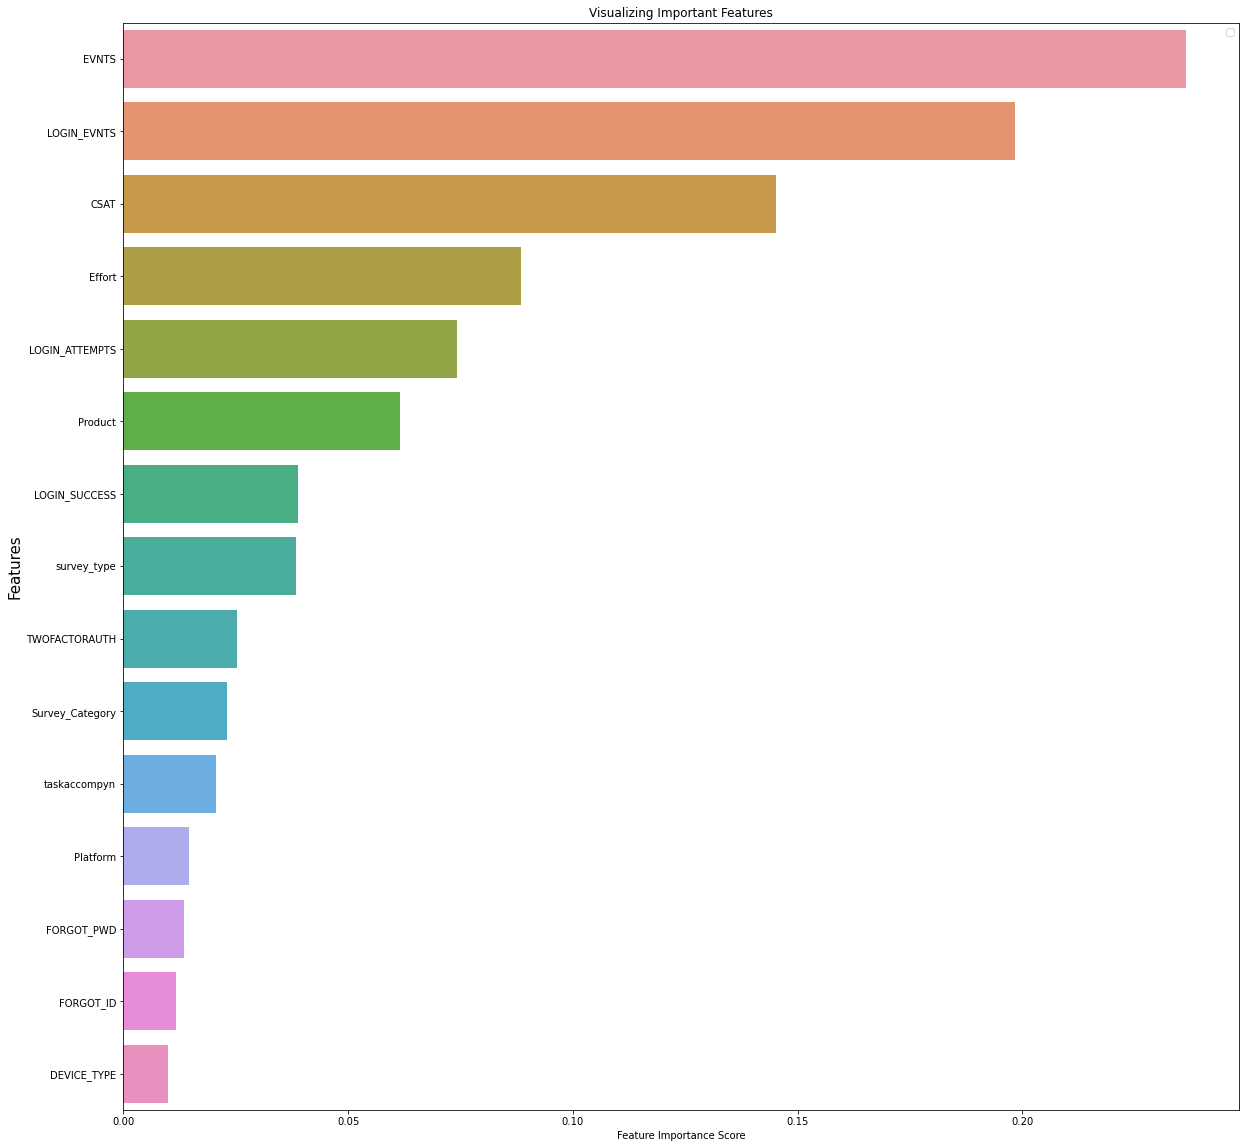

In [95]:
X=data.drop(columns=['Login'])
y=data['Login']
rf = DecisionTreeClassifier()
rf.fit(X, y)
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(20, 20))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features',fontsize=15)
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [96]:
feature_imp

EVNTS              0.236417
LOGIN_EVNTS        0.198372
CSAT               0.145210
Effort             0.088385
LOGIN_ATTEMPTS     0.074230
Product            0.061481
LOGIN_SUCCESS      0.038931
survey_type        0.038353
TWOFACTORAUTH      0.025287
Survey_Category    0.022984
taskaccompyn       0.020709
Platform           0.014592
FORGOT_PWD         0.013517
FORGOT_ID          0.011641
DEVICE_TYPE        0.009890
dtype: float64

> We can see the features using Login, there three features which are very important with the following scores:
- EVNTS              0.235555
- LOGIN_EVNTS        0.198773
- CSAT               0.144637

### Features Importance with respect to 2fa

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


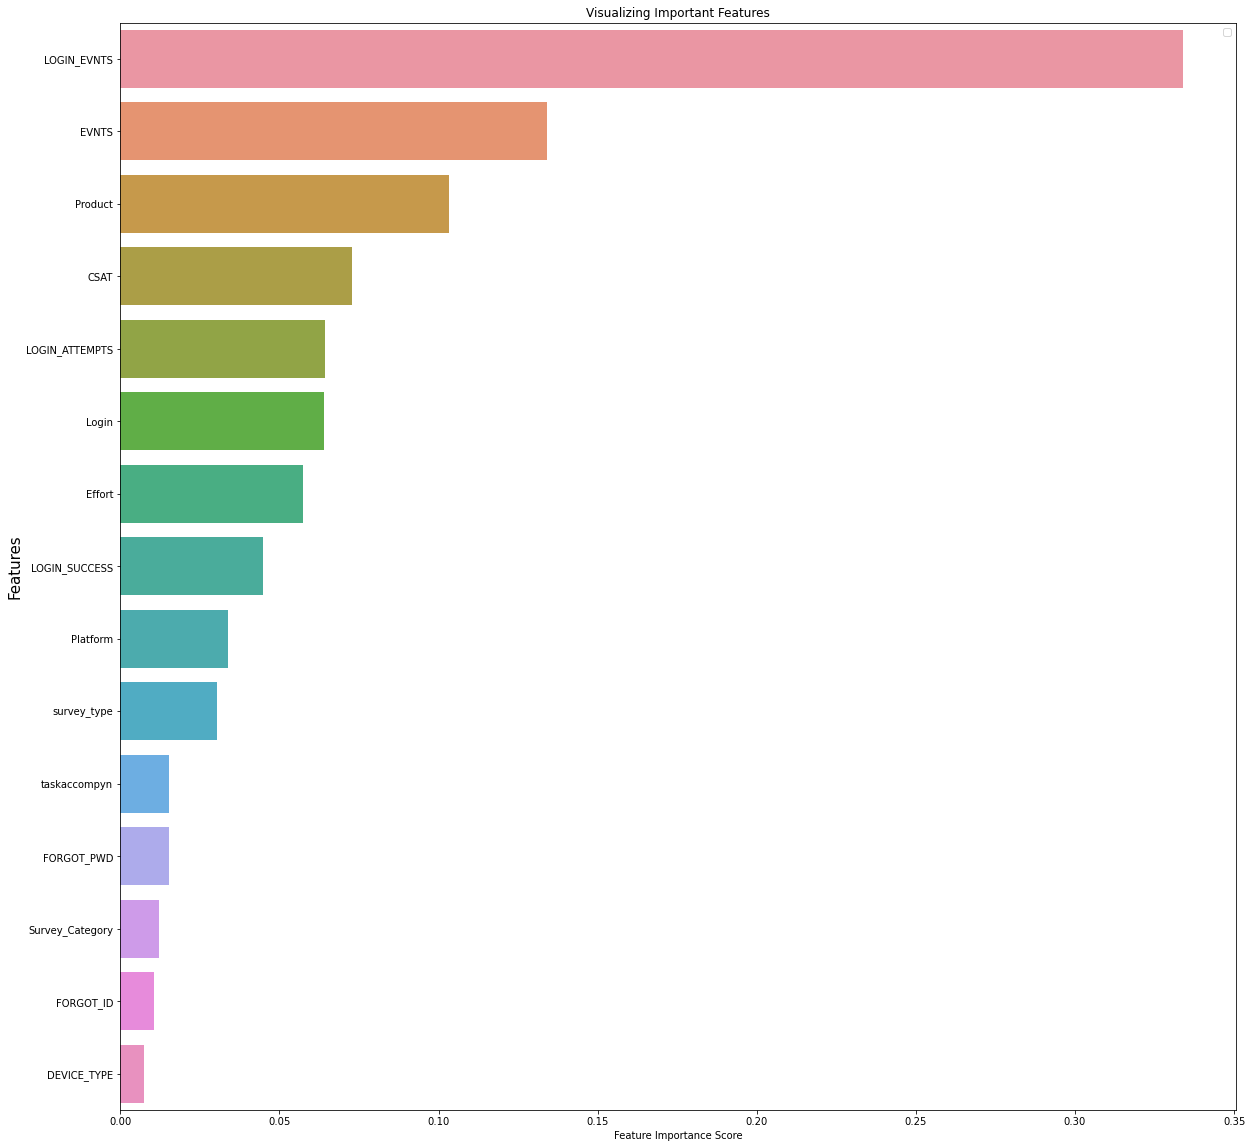

In [97]:
X=data.drop(columns=['TWOFACTORAUTH'])
y=data['TWOFACTORAUTH']

rf = DecisionTreeClassifier()
rf.fit(X, y)
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(20, 20))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features',fontsize=15)
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [98]:
feature_imp

LOGIN_EVNTS        0.333983
EVNTS              0.134216
Product            0.103409
CSAT               0.072724
LOGIN_ATTEMPTS     0.064266
Login              0.064028
Effort             0.057276
LOGIN_SUCCESS      0.044893
Platform           0.033765
survey_type        0.030456
taskaccompyn       0.015369
FORGOT_PWD         0.015256
Survey_Category    0.012283
FORGOT_ID          0.010542
DEVICE_TYPE        0.007533
dtype: float64

> We can see the features using 2FA, there three features which are very important with the following scores:
- LOGIN_EVNTS        0.334293
- EVNTS              0.133467
- Product            0.103338

### Frquently forgot passsowrd for different tasks and customers coming from different products and platoforms

In [99]:
dat = data1[['main_task', "Product", 'FORGOT_PWD']].groupby(['Product', 'main_task'])[['FORGOT_PWD']].sum().sort_values(by = 'FORGOT_PWD', ascending=False).head(50)
dat = dat.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).sort_values(by = 'FORGOT_PWD', ascending=False).style.background_gradient(cmap='PuBu')
dat

## Correlation between forgot ID and forgot password and 2fa or no 2fa

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

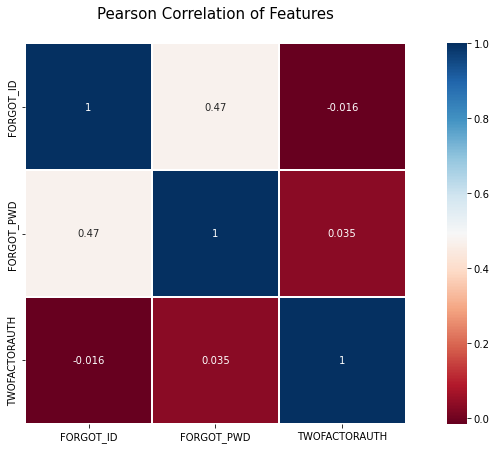

In [100]:
cols=['FORGOT_ID','FORGOT_PWD', 'TWOFACTORAUTH']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [101]:
cols.corr()

,FORGOT_ID,FORGOT_PWD,TWOFACTORAUTH
FORGOT_ID,1.000000,0.468791,-0.016105
FORGOT_PWD,0.468791,1.000000,0.035242
TWOFACTORAUTH,-0.016105,0.035242,1.000000


> The correlation of forget password and forget ID is strong but these two features are not well correlated with the 2fa. 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

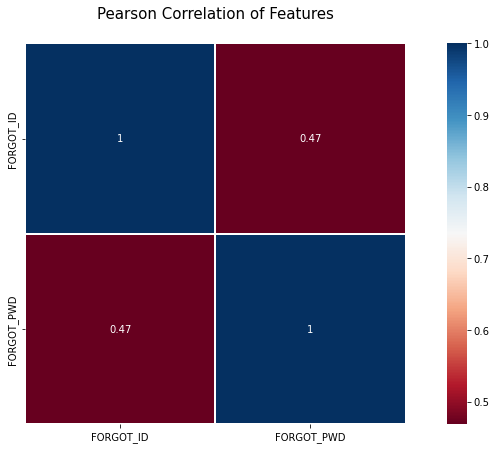

In [102]:
cols=['FORGOT_ID','FORGOT_PWD']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [103]:
cols.corr()

,FORGOT_ID,FORGOT_PWD
FORGOT_ID,1.000000,0.468791
FORGOT_PWD,0.468791,1.000000


> There is strong correlation between forget id and foreget password. Most of the time, user forget password. 

# Feature correlation with task accomplishment

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

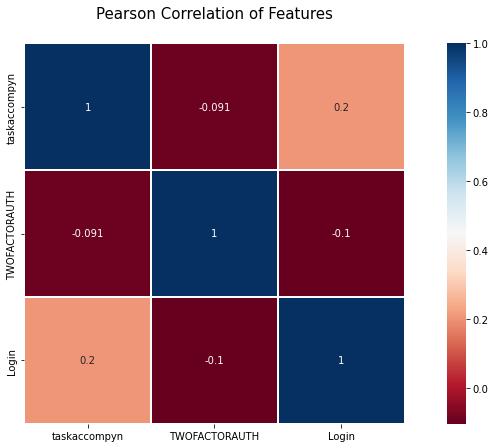

In [104]:
cols=['taskaccompyn','TWOFACTORAUTH','Login']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [105]:
cols.corr()

,taskaccompyn,TWOFACTORAUTH,Login
taskaccompyn,1.000000,-0.090655,0.204443
TWOFACTORAUTH,-0.090655,1.000000,-0.103000
Login,0.204443,-0.103000,1.000000


> Week correlation betweek task accomplishment and 2FA. There is no any need of correlation for these features. I think it should be strong but login correlation is good with the task acccomplishment.

### Looking at the frequancy of forget password with main task and product

In [106]:
dat = data1[['main_task', "Product", 'FORGOT_PWD']].groupby(['Product', 'main_task'])[['FORGOT_PWD']].sum().sort_values(by = 'FORGOT_PWD', ascending=False).head(50)
dat = dat.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).sort_values(by = 'main_task', ascending=False).style.background_gradient(cmap='BuGn')
dat

### Login attempts with highest number of two factor authenitcation

Text(0.5, 1.0, 'Login attempts with highest number of two factor authenitcation')

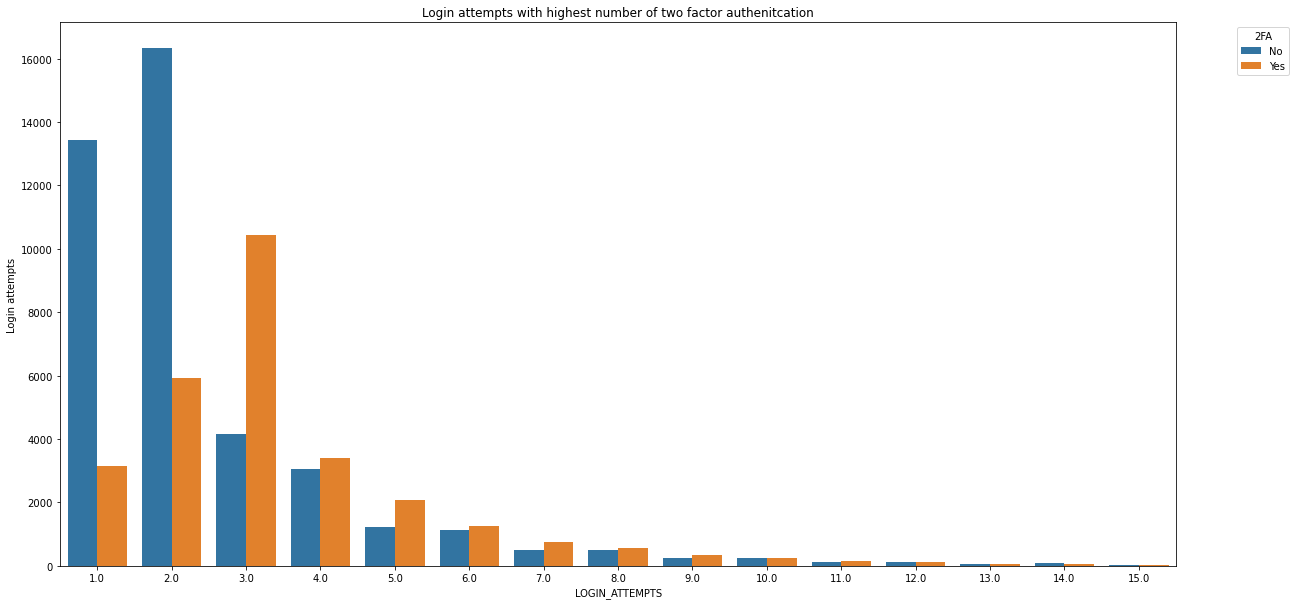

In [107]:
data2=data1.copy()
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(0.0,'No')
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(1.0,'Yes')
dff = data2[['LOGIN_ATTEMPTS', 'TWOFACTORAUTH']].value_counts().reset_index().sort_values(by = 'LOGIN_ATTEMPTS', ascending = True).head(30)
sns.barplot(x = 'LOGIN_ATTEMPTS', y  = 0, hue = 'TWOFACTORAUTH', data = dff)
plt.legend(title='2FA', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.ylabel("Login attempts")
plt.title("Login attempts with highest number of two factor authenitcation")

## Looking at the features correlation using every field

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

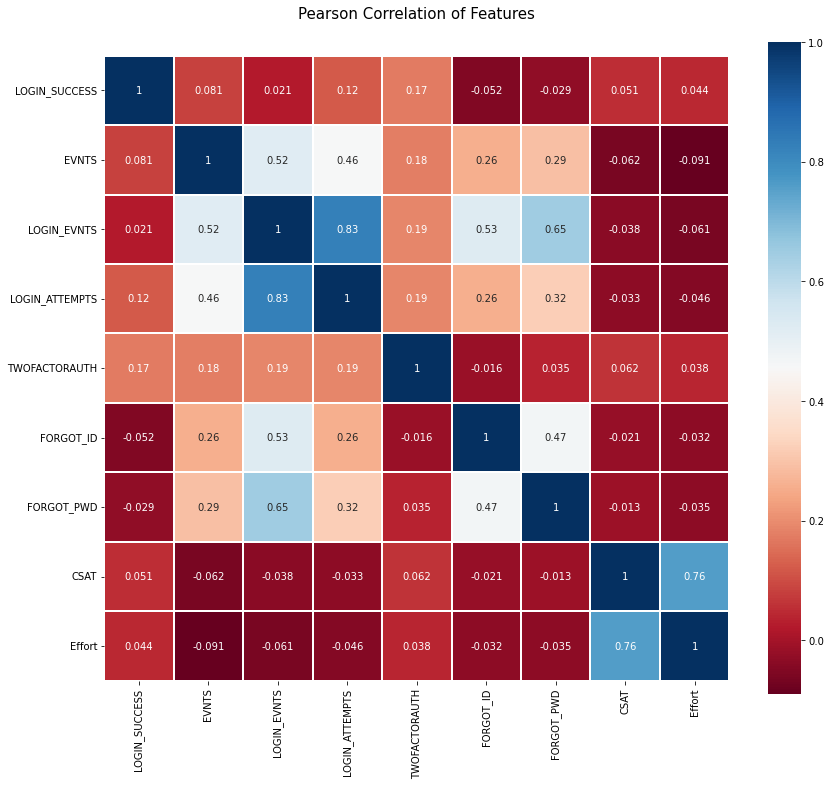

In [108]:
allcol=['LOGIN_SUCCESS', 'EVNTS', 'LOGIN_EVNTS', 'LOGIN_ATTEMPTS',
       'TWOFACTORAUTH', 'FORGOT_ID', 'FORGOT_PWD', 'DEVICE_TYPE',
       'Survey_Category', 'Product', 'Platform', 'main_task', 'CSAT', 'Effort',
       'taskaccompyn', 'survey_type', 'Login']

allcol=data1[allcol]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(allcol.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

> We can see the correlation of all the features. The side bar shows how these features are correlated with each other. Dark blue color shows the strong correation while dark brown shows the week correlation.

### Top 10 Login Events with higher number of customer two factor authentication

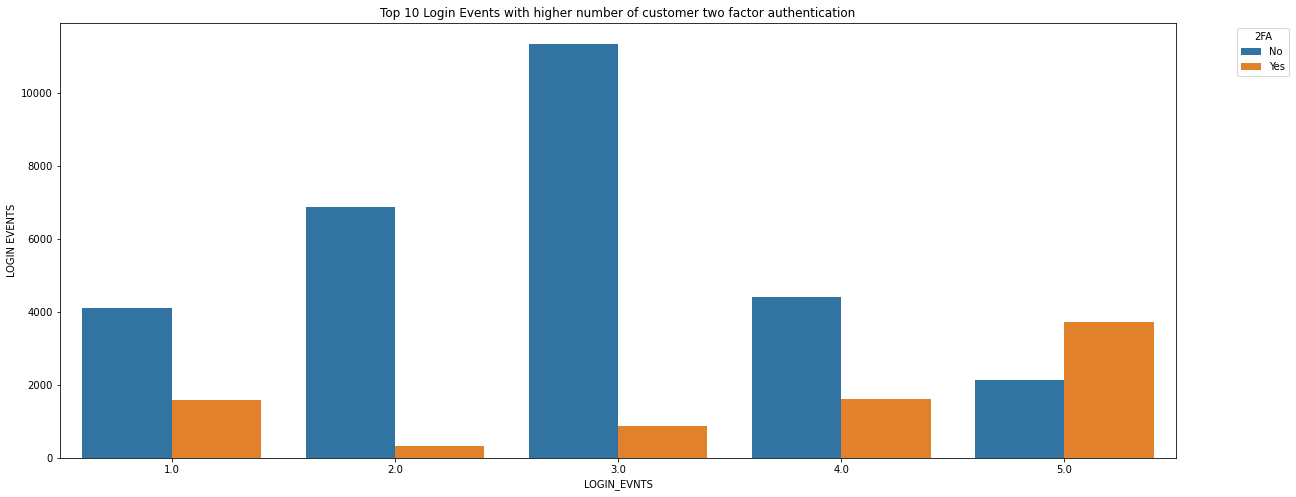

In [109]:
plt.figure(figsize=(20,8))
data2=data1.copy()
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(0.0,'No')
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(1.0,'Yes')
dat2 = data2[['LOGIN_EVNTS', 'TWOFACTORAUTH']].value_counts().reset_index().sort_values(by = 'LOGIN_EVNTS', ascending = True)
dat2 = dat2[dat2["LOGIN_EVNTS"] > 0].head(10)
sns.barplot(x = 'LOGIN_EVNTS', y  = 0, hue = 'TWOFACTORAUTH', data = dat2.sort_values(0, ascending = False))
plt.legend(title='2FA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("LOGIN EVENTS")
plt.title("Top 10 Login Events with higher number of customer two factor authentication");

## Correlation of task accomplishment with each login type

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

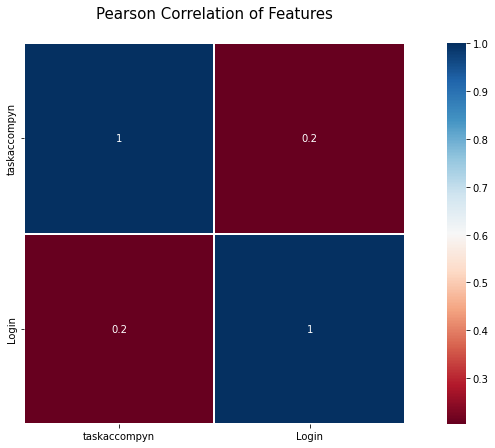

In [118]:
cols=['taskaccompyn','Login']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [119]:
cols.corr()

,taskaccompyn,Login
taskaccompyn,1.000000,0.204443
Login,0.204443,1.000000


> Correlation of the task accompishment is good with the login types. 20% correlation is godd. 

## Correlation of task accomplishment with product and  login types

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

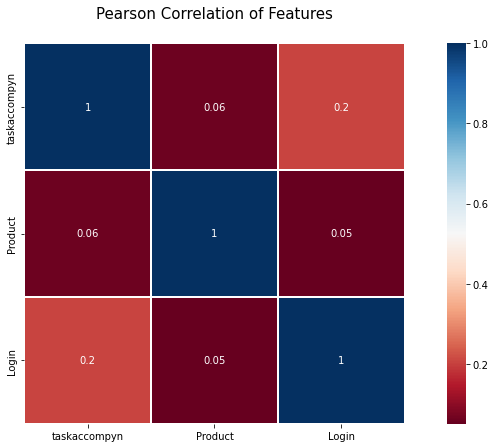

In [120]:
cols=['taskaccompyn','Product','Login']
cols=data[cols]
colormap = plt.cm.RdBu
plt.figure(figsize=(15,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cols.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [121]:
cols.corr()

,taskaccompyn,Product,Login
taskaccompyn,1.000000,0.05965,0.204443
Product,0.059650,1.00000,0.050210
Login,0.204443,0.05021,1.000000


> Interestingly, the correlation of product is also good with login type and task accomplishment. 

## Bar plot of all variables with the relation of login

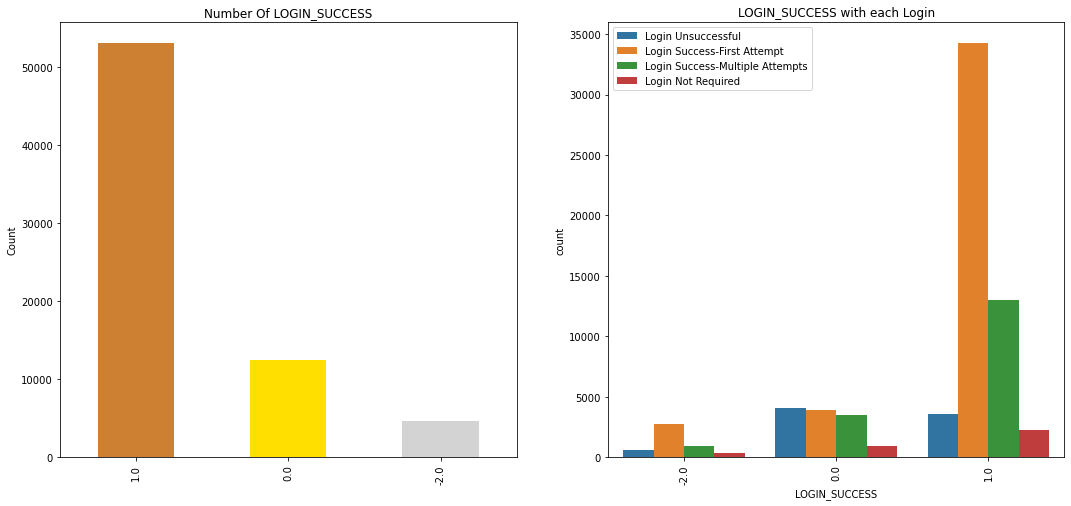

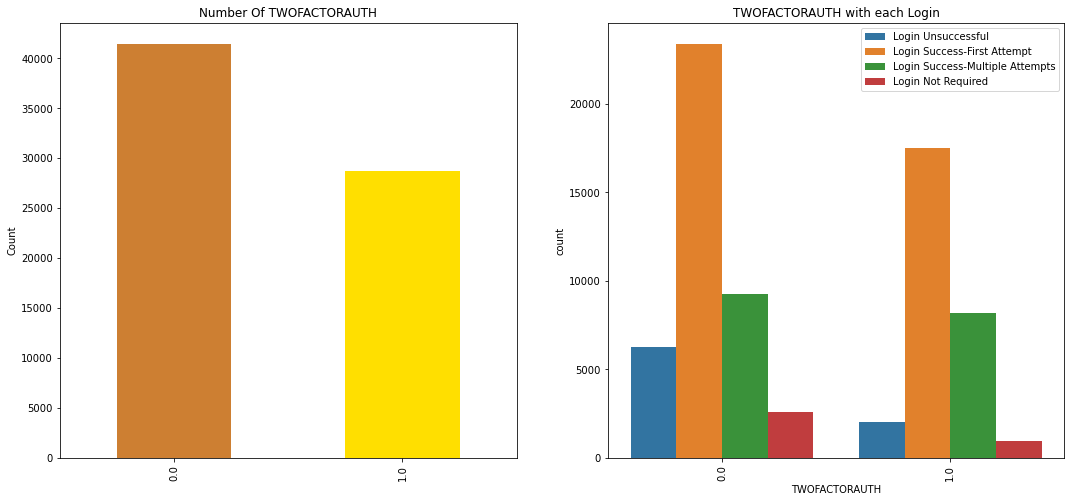

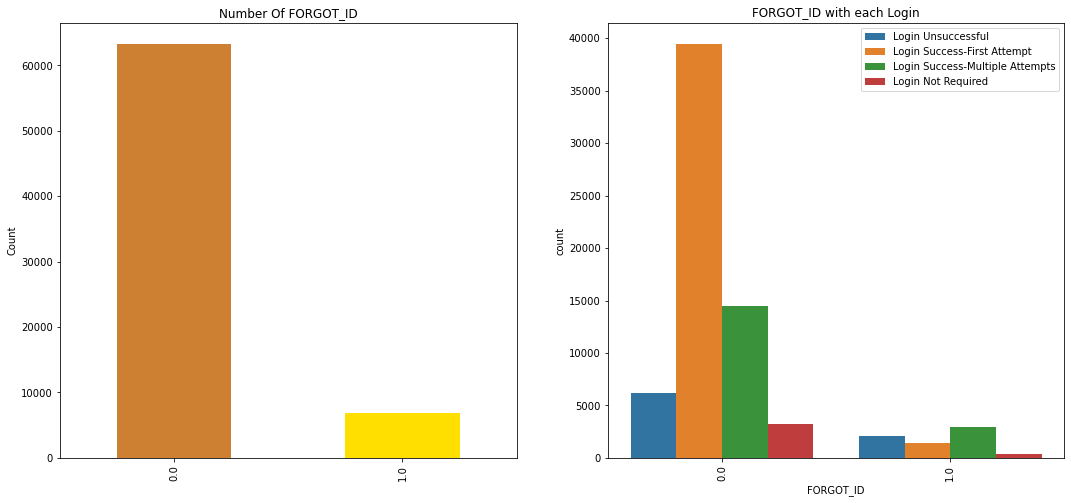

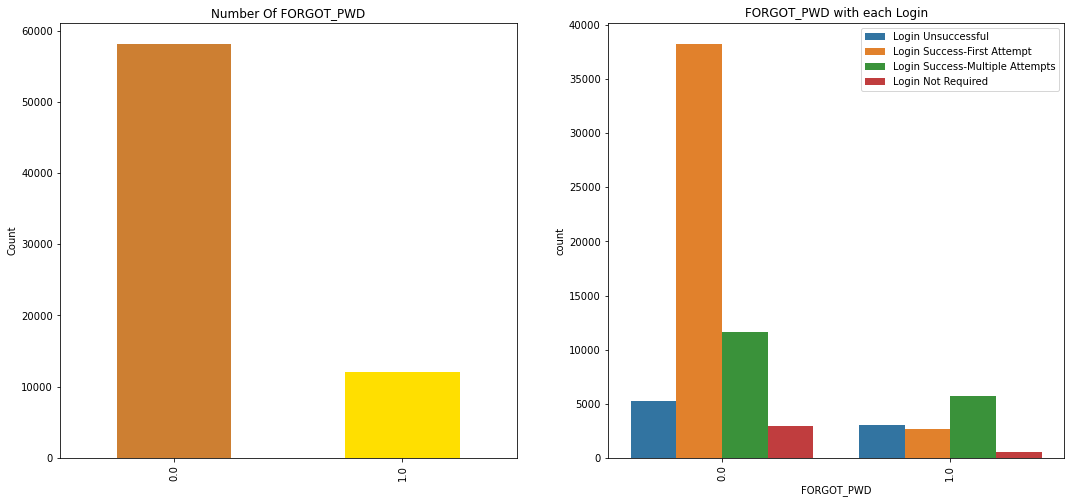

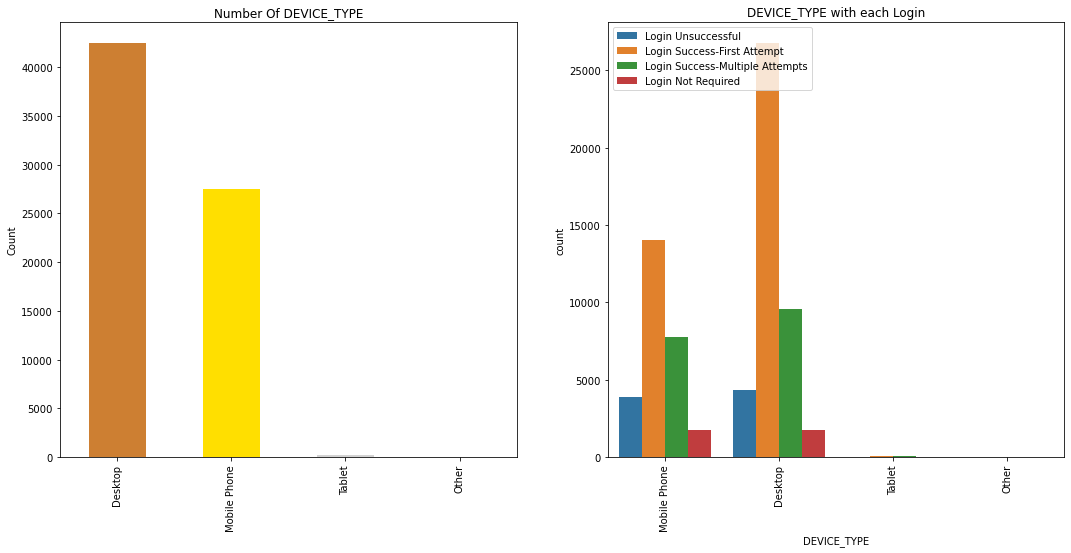

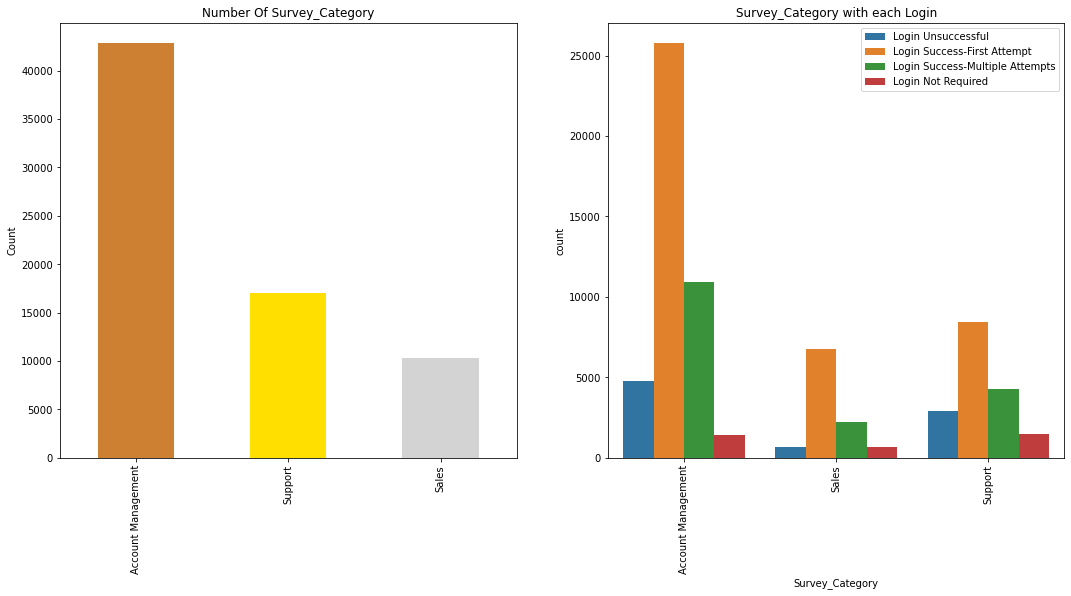

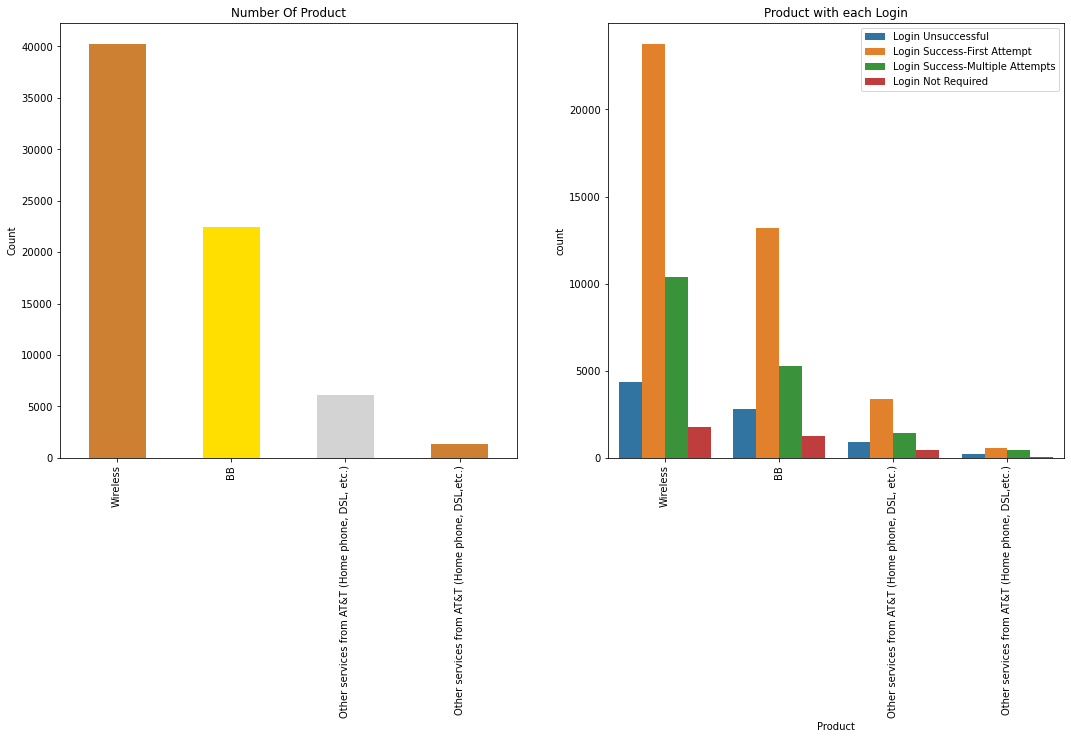

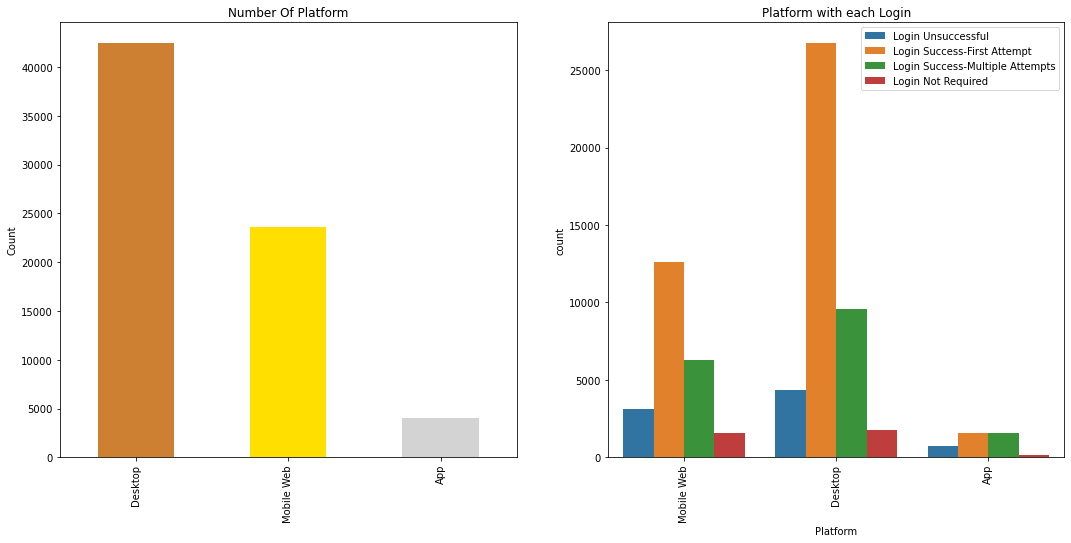

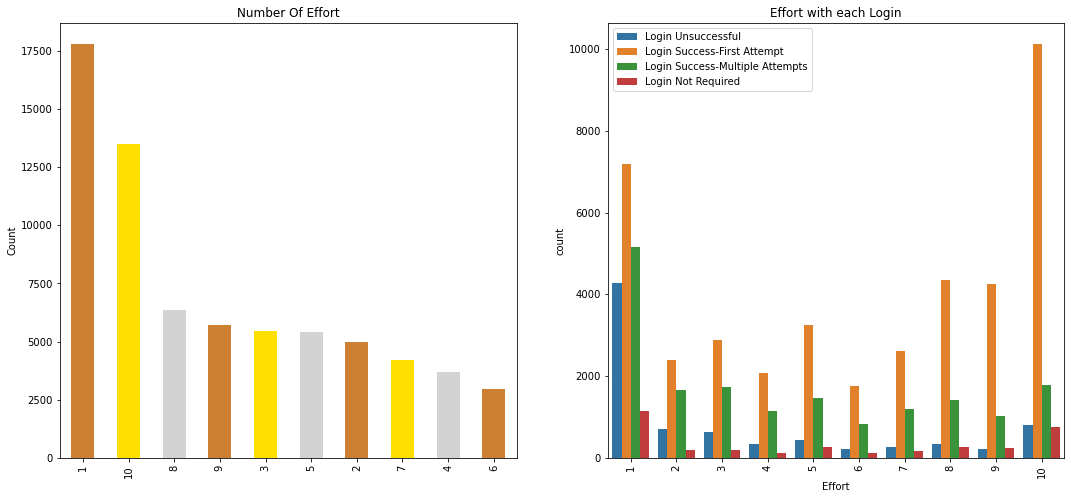

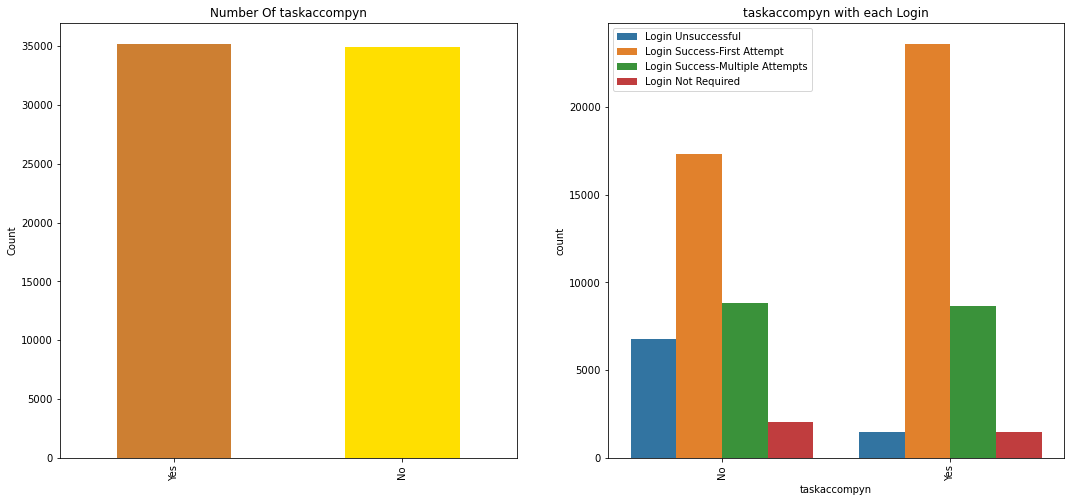

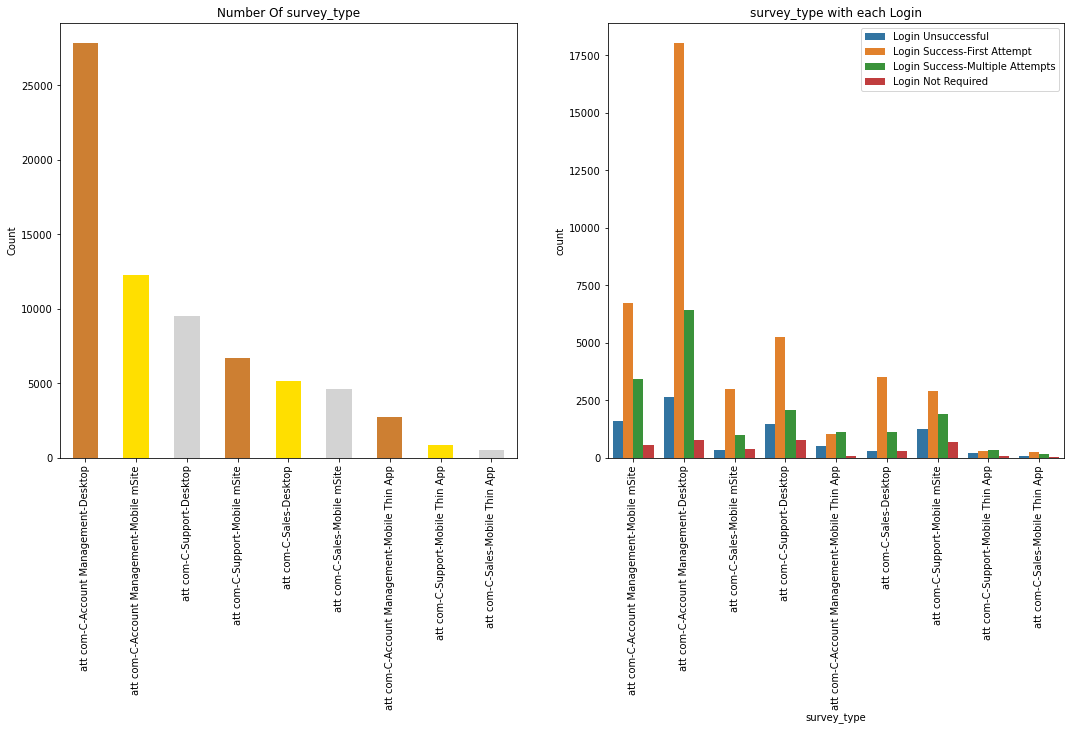

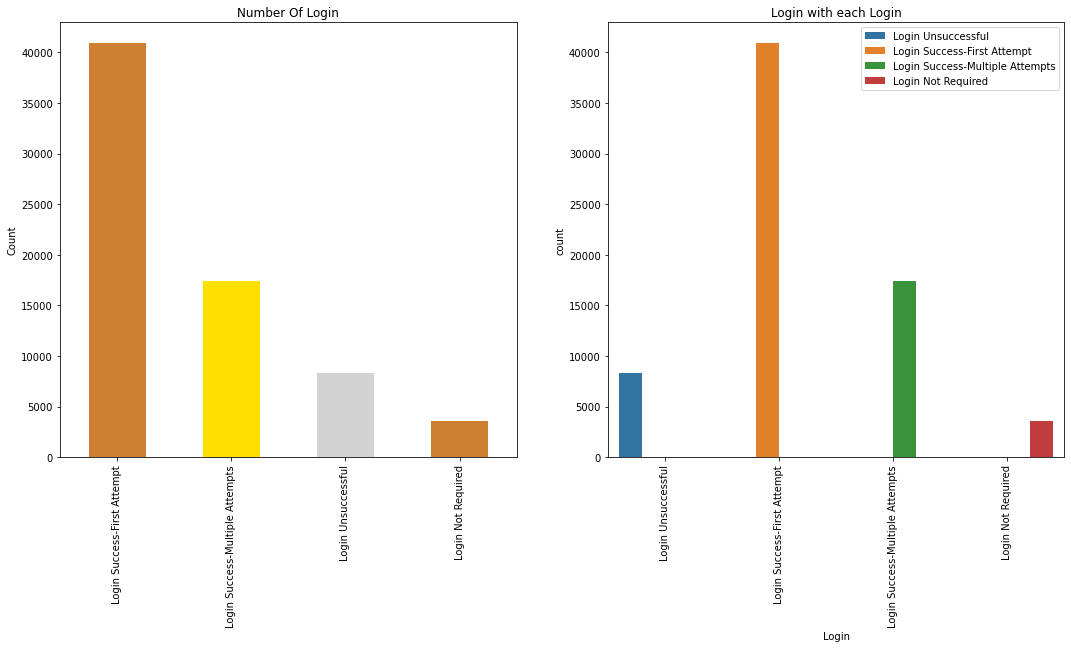

In [110]:
col=['LOGIN_SUCCESS','TWOFACTORAUTH', 'FORGOT_ID', 'FORGOT_PWD', 'DEVICE_TYPE',
       'Survey_Category', 'Product', 'Platform', 'Effort',
       'taskaccompyn', 'survey_type', 'Login']
col=data1[col]
for i in col.columns:
    f,ax=plt.subplots(1,2,figsize=(18,8))
    col[i].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
    ax[0].set_title('Number Of '+i)
    ax[0].set_ylabel('Count')
    sns.countplot(i,hue='Login',data=col,ax=ax[1])
    ax[1].set_title(i+' with each Login')
    plt.xticks(rotation=90)
    plt.legend(loc='best')
    plt.show()

> We can also look at the diffrent values of the features as compare to Login. We can clearly see the distribution of values with Login.

### Login attempts and Forgot ID

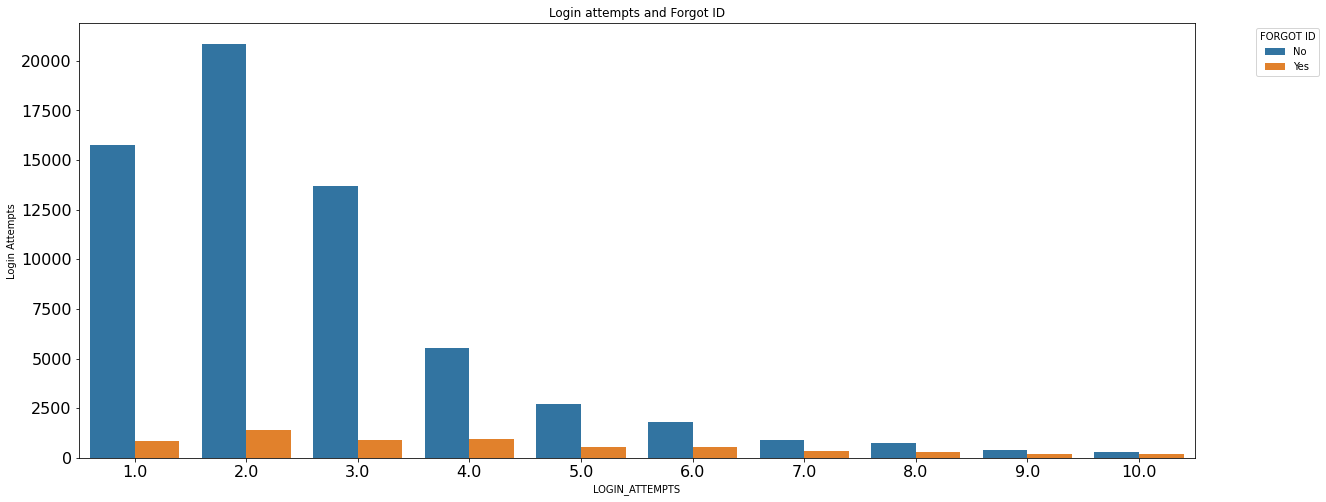

In [112]:
plt.figure(figsize=(20,8))
data2=data1.copy()
data2['FORGOT_ID']=data2['FORGOT_ID'].replace(0.0,'No')
data2['FORGOT_ID']=data2['FORGOT_ID'].replace(1.0,'Yes')
dat = data2[['LOGIN_ATTEMPTS', 'FORGOT_ID']].value_counts().reset_index().sort_values(by = 'LOGIN_ATTEMPTS', ascending = True).head(20)
sns.barplot(x = 'LOGIN_ATTEMPTS', y  = 0, hue = 'FORGOT_ID', data = dat.sort_values(0, ascending = False))
plt.legend(title='FORGOT ID', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.ylabel("Login Attempts")
plt.title("Login attempts and Forgot ID")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

## Looking at the bat chat of 2FA with its login types and CSAT

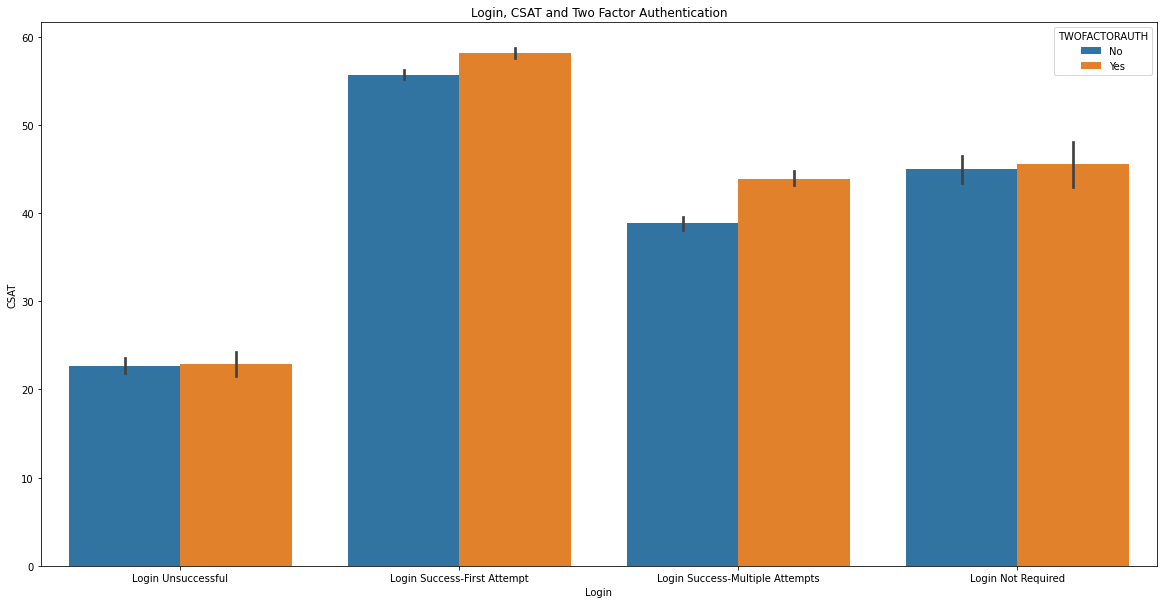

In [124]:
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(0.0,'No')
data2['TWOFACTORAUTH']=data2['TWOFACTORAUTH'].replace(1.0,'Yes')
sns.barplot(x = 'Login', y = 'CSAT', hue = 'TWOFACTORAUTH', data = data2)
plt.title("Login, CSAT and Two Factor Authentication");

> Most of the time, Login was successful with the first attempt using 2FA. 

### Impact of login variables on csat

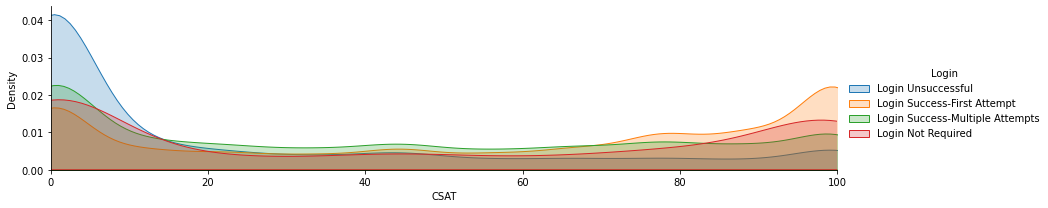

In [113]:
feature='CSAT'
a = sns.FacetGrid(data1, hue = 'Login', aspect=4 )
a.map(sns.kdeplot, feature, shade= True )
a.set(xlim=(0 , data[feature].max()))
a.add_legend()

> CSAT is mostly distrubuted either to 0 or 100. Most of the time login was unsuccessful while CSAT were 0 and then login successful with multiple attempts.

### Impact of login variables on LOGIN SUCCESS

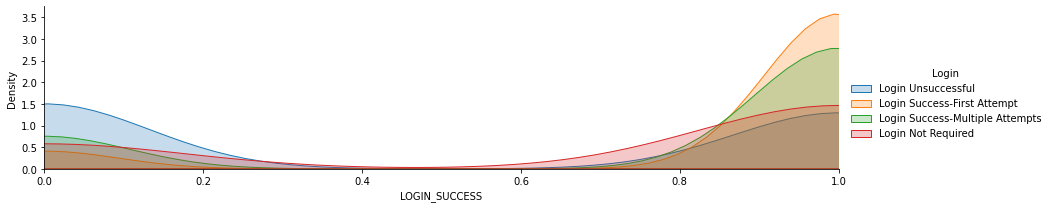

In [114]:
feature='LOGIN_SUCCESS'
a = sns.FacetGrid(data1, hue = 'Login', aspect=4 )
a.map(sns.kdeplot, feature, shade= True )
a.set(xlim=(0 , data[feature].max()))
a.add_legend()

> Login success is mostly distrubuted to 1. Most of the time login was successful with the first attempt and then with multiple attempts.

### Impact of login variables on 2FA

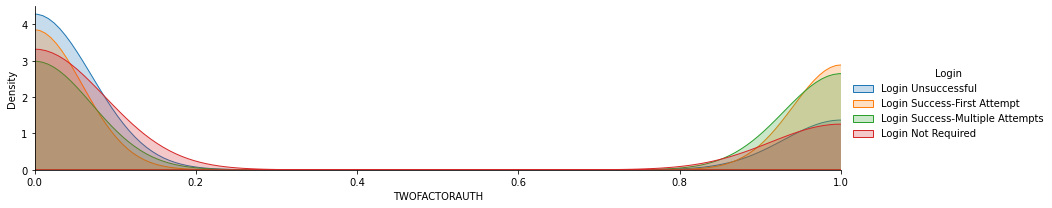

In [115]:
feature='TWOFACTORAUTH'
a = sns.FacetGrid(data1, hue = 'Login', aspect=4 )
a.map(sns.kdeplot, feature, shade= True )
a.set(xlim=(0 , data[feature].max()))
a.add_legend()

> While looking at the impact of login with 2FA, the range density mostly distributed to unsuccessful 2FA. Most of the time, login was unsuccessful.  

## Login attempts with the login types

In [132]:
crostab = pd.crosstab(data2['Login'],data2['LOGIN_ATTEMPTS']).style.background_gradient(cmap='Greens')
display(crostab)

LOGIN_ATTEMPTS,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,42.000000,43.000000,45.000000,48.000000,49.000000,50.000000,54.000000,56.000000,70.000000,83.000000
Login,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Login Not Required,1010,1230,566,316,136,94,51,47,15,25,13,6,6,9,0,4,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Login Success-First Attempt,10370,14475,9892,3163,1274,732,354,255,130,101,40,39,14,25,16,6,7,4,2,5,2,1,2,0,3,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Login Success-Multiple Attempts,3481,4232,3130,1995,1412,1045,615,492,308,220,115,113,63,65,30,24,21,13,11,8,5,4,5,4,3,6,2,1,1,2,2,1,0,1,1,0,0,0,0,1,0,0,2,1,0,0,0,0,1,0
Login Unsuccessful,1733,2327,1014,989,457,519,233,255,125,142,98,84,49,57,22,34,19,17,19,14,7,6,1,6,2,3,4,3,2,4,0,1,4,2,1,1,1,2,3,0,2,1,0,0,1,1,1,1,0,1


> We can see that how many attempts were tried while login. So we can see that how many attempts tried with each login type. With the first attempt, there are the following counts:
- Login Not Required	1010	
- Login Success-First Attempt	10370	
- Login Success-Multiple Attempts	3481	
- Login Unsuccessful	1733

The interesting thing is that, some of the customer tried upto 83 times and reamined unsuccessful instead of trying forgot password. 

<div class="alert alert-block alert-info">  
<h1><center><strong>Actionable Insights & analysis 📝</strong></center></h1>
    <p>By using the login data, first we prepared the data using different files but merge them foresee session id. It was a difficult task to merge the data of different files with the different dimensions  but the goal was to get data with the same dates without any repetition. We analysed the data deeply using each variable in the data. By visualizing the features, we analysed that what are the trends in the data and how the values of each feature are distributed with the other features.We calculated the correlation of different features and discussed their outcomes. We endcoded the features and trained the decision tree model to know the login and 2fa experiance. We calculated the importance of the features and worked on the mask task and applied the natural language processing techniques to know the text data. We also look at the frquently forgot passsowrd for different tasks and customers coming from different products and platoforms and also other analysis of product, forget password, login success and main task. We analysed that there is a very small portion of users who lost their ID after login attempts. 2FA is very important and we analysed that majority of tasks required two factor authentication from customers</p>